# Exploratory Data Analysis – Amazing International Airlines (AIAI)

**Group 68**

## 1. Business & Data Understanding

**Business Objective**: Identify distinct customer segments within AIAI's loyalty program to enable targeted marketing strategies and improve customer retention.

**Data Sources**:
- `DM_AIAI_CustomerDB.csv`: Customer demographics and loyalty information
- `DM_AIAI_FlightsDB.csv`: Monthly flight activity records

**Expected Outcome**: Clean, merged dataset with engineered features ready for clustering analysis.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load customer and flight databases
df_customer = pd.read_csv('Data/DM_AIAI_CustomerDB.csv')
df_flights = pd.read_csv('Data/DM_AIAI_FlightsDB.csv')

print(f"Customer records: {df_customer.shape[0]:,} rows × {df_customer.shape[1]} columns")
print(f"Flight records: {df_flights.shape[0]:,} rows × {df_flights.shape[1]} columns")

Customer records: 16,921 rows × 21 columns
Flight records: 608,436 rows × 10 columns


In [3]:
# Display first few rows of customer database
df_customer.head()

Unnamed: 0  Loyalty# First Name    Last Name        Customer Name Country  \
0           0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1           1    549612      Dayle        Menez          Dayle Menez  Canada   
2           2    429460     Necole       Hannon        Necole Hannon  Canada   
3           3    608370      Queen        Hagee          Queen Hagee  Canada   
4           4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0             2/15/2019              NaN                  3839.14   
1              3/9/2019              NaN                  3839.61   
2             7/14/2017         1/8/2021                  3839.75   
3             2/17/2016              NaN                  3839.75   
4            10/25/2017              NaN                  3842.79   

   EnrollmentType  
0        Standard  
1        Standard  
2        Standard  
3        Standard  
4  2021 Promotion

In [4]:
# Display first few rows of flights database
df_flights.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

In [5]:
# Remove unnecessary index column
df_customer.drop(columns=['Unnamed: 0'], inplace=True)
print("✓ Removed 'Unnamed: 0' column")
df_customer.head()

✓ Removed 'Unnamed: 0' column


Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    549612      Dayle        Menez          Dayle Menez  Canada   
2    429460     Necole       Hannon        Necole Hannon  Canada   
3    608370      Queen        Hagee          Queen Hagee  Canada   
4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0             2/15/2019              NaN                  3839.14   
1              3/9/2019              NaN                  3839.61   
2             7/14/2017         1/8/2021                  3839.75   
3             2/17/2016              NaN                  3839.75   
4            10/25/2017              NaN                  3842.79   

   EnrollmentType  
0        Standard  
1        Standard  
2        Standard  
3        Standard  
4  2021 Promotion

In [6]:
df_customer.describe()

Loyalty#      Latitude     Longitude        Income  \
count   16921.000000  16921.000000  16921.000000  16901.000000   
mean   550197.393771     47.174500    -91.814768  37758.038400   
std    259251.503597      3.307971     22.242429  30368.992499   
min    100011.000000     42.984924   -135.056840      0.000000   
25%    326823.000000     44.231171   -120.237660      0.000000   
50%    550896.000000     46.087818    -79.383186  34161.000000   
75%    772438.000000     49.282730    -74.596184  62396.000000   
max    999999.000000     60.721188    -52.712578  99981.000000   

       Customer Lifetime Value  
count             16901.000000  
mean               7990.460188  
std                6863.173093  
min                1898.010000  
25%                3979.720000  
50%                5780.180000  
75%                8945.690000  
max               83325.380000

In [7]:
df_flights.describe()

Loyalty#           Year          Month     NumFlights  \
count  608436.000000  608436.000000  608436.000000  608436.000000   
mean   550037.873084    2020.000000       6.500000       3.908107   
std    258935.180575       0.816497       3.452055       5.057889   
min    100018.000000    2019.000000       1.000000       0.000000   
25%    326961.000000    2019.000000       3.750000       0.000000   
50%    550834.000000    2020.000000       6.500000       0.000000   
75%    772194.000000    2021.000000       9.250000       7.200000   
max    999986.000000    2021.000000      12.000000      21.000000   

       NumFlightsWithCompanions     DistanceKM  PointsAccumulated  \
count             608436.000000  608436.000000      608436.000000   
mean                   0.983944    7939.341419         793.777781   
std                    2.003785   10260.421873        1025.918521   
min                    0.000000       0.000000           0.000000   
25%                    0.000000       0.000000           0.000000   
50%                    0.000000     856.400000          85.275000   
75%                    0.900000   15338.175000        1533.712500   
max                   11.000000   42040.000000        4204.000000   

       PointsRedeemed  DollarCostPointsRedeemed  
count   608436.000000             608436.000000  
mean       235.251678                  2.324835  
std        983.233374                  9.725168  
min          0.000000                  0.000000  
25%          0.000000                  0.000000  
50%          0.000000                  0.000000  
75%          0.000000                  0.000000  
max       7496.000000                 74.000000

In [8]:
df_customer.info()

df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status        

**Initial Observations**:
- Customer database contains demographic information (gender, education, marital status) and loyalty metrics
- Flights database tracks monthly activity including distance, points, and companion flights
- Some columns require data type conversions (dates, integers)

## 2. Data Quality Assessment

This section identifies and addresses data quality issues including duplicates, missing values, incorrect data types, and outliers.

In [9]:
# Fix data types: convert dates and flight counts
df_customer['EnrollmentDateOpening'] = pd.to_datetime(df_customer['EnrollmentDateOpening'], errors='coerce')
df_customer['CancellationDate'] = pd.to_datetime(df_customer['CancellationDate'], errors='coerce')
df_flights['YearMonthDate'] = pd.to_datetime(df_flights['YearMonthDate'], errors='coerce')

# Round the float values to the nearest integer before converting to Int64
df_flights['NumFlights'] = df_flights['NumFlights'].round().astype('Int64')
df_flights['NumFlightsWithCompanions'] = df_flights['NumFlightsWithCompanions'].round().astype('Int64')

In [10]:
# Unique value counts for all object columns
cat_summary = (df_customer.select_dtypes(include='object').nunique().sort_values(ascending=False).to_frame(name='Unique_Values'))

print("Categorical Column Cardinality:")
display(cat_summary)

for col in df_customer.select_dtypes(include='object').columns:
    uniques = df_customer[col].dropna().unique()
    print(f"\n--- {col} ---")
    print(f"{len(uniques)} unique values")
    print(uniques[:10])

Categorical Column Cardinality:


Unique_Values
Customer Name              16921
Last Name                  15404
First Name                  4941
Postal code                   75
City                          29
Province or State             11
Education                      5
Location Code                  3
Marital Status                 3
LoyaltyStatus                  3
Gender                         2
EnrollmentType                 2
Country                        1


--- First Name ---
4941 unique values
['Cecilia' 'Dayle' 'Necole' 'Queen' 'Claire' 'Leatrice' 'Hue' 'Nakia'
 'Arlene' 'Dustin']

--- Last Name ---
15404 unique values
['Householder' 'Menez' 'Hannon' 'Hagee' 'Latting' 'Hanlin' 'Sellner'
 'Cash' 'Conterras' 'Recine']

--- Customer Name ---
16921 unique values
['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' 'Queen Hagee'
 'Claire Latting' 'Leatrice Hanlin' 'Hue Sellner' 'Nakia Cash'
 'Arlene Conterras' 'Dustin Recine']

--- Country ---
1 unique values
['Canada']

--- Province or State ---
11 unique values
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland']

--- City ---
29 unique values
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton']

--- Postal code ---
75 unique values
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8']

--- Gender ---
2

In [11]:
# Check for duplicate customer records
dups_customers = df_customer.duplicated(subset=['Loyalty#']).sum()
print(f"Duplicate Loyalty# in CustomerDB: {dups_customers}")

if dups_customers > 0:
    print("\nInspecting duplicates:")
    display(df_customer[df_customer.duplicated(subset=['Loyalty#'], keep=False)])
    
    # Remove duplicates, keeping first occurrence
    df_customer = df_customer.drop_duplicates(subset=['Loyalty#'], keep='first')
    print(f"✓ Removed {dups_customers} duplicate customer records")
else:
    print("✓ No duplicate customers found")

Duplicate Loyalty# in CustomerDB: 164

Inspecting duplicates:


Loyalty# First Name   Last Name      Customer Name Country  \
5        193662   Leatrice      Hanlin    Leatrice Hanlin  Canada   
123      746226   Theodora    Sampieri  Theodora Sampieri  Canada   
141      279419      Reyes     Sobczak      Reyes Sobczak  Canada   
161      354438   Maricela       Veals     Maricela Veals  Canada   
204      719633     Elnora  Holzmiller  Elnora Holzmiller  Canada   
...         ...        ...         ...                ...     ...   
16488    373638    Sherryl     Vanduyn    Sherryl Vanduyn  Canada   
16625    727507     Marnie      Kisner      Marnie Kisner  Canada   
16766    278854    Marylee   Villicana  Marylee Villicana  Canada   
16775    434807       Cira      Nalley        Cira Nalley  Canada   
16881    368073    Enedina    Dickason   Enedina Dickason  Canada   

      Province or State            City   Latitude   Longitude Postal code  \
5                 Yukon      Whitehorse  60.721188 -135.056840     Y2K 6R0   
123    British Columbia        Whistler  50.116322 -122.957360     V6T 1Y8   
141    British Columbia  West Vancouver  49.328625 -123.160190     V6V 8Z3   
161              Quebec        Montreal  45.501690  -73.567253     H2T 2J6   
204    British Columbia        Victoria  48.428421 -123.365650     V10 6T5   
...                 ...             ...        ...         ...         ...   
16488            Quebec       Tremblant  46.118462  -74.596184     H5Y 2S9   
16625           Alberta           Banff  51.178398 -115.570800     T4V 1D4   
16766            Quebec       Tremblant  46.118462  -74.596184     H5Y 2S9   
16775           Alberta        Edmonton  53.544388 -113.490930     T9G 1W3   
16881            Quebec     Quebec City  46.813877  -71.207977     G1B 3L5   

       Gender             Education Location Code   Income Marital Status  \
5        male              Bachelor         Rural  26262.0        Married   
123    female              Bachelor         Urban  43177.0        Married   
141    female               College         Urban      0.0         Single   
161      male               College         Rural      0.0        Married   
204      male              Bachelor      Suburban  27608.0       Divorced   
...       ...                   ...           ...      ...            ...   
16488  female               College         Rural      0.0         Single   
16625    male              Bachelor      Suburban  93011.0       Divorced   
16766  female  High School or Below         Urban  20799.0         Single   
16775    male              Bachelor         Rural  35296.0         Single   
16881    male              Bachelor         Urban  66661.0         Single   

      LoyaltyStatus EnrollmentDateOpening CancellationDate  \
5              Star            2015-05-07              NaT   
123            Star            2021-01-17              NaT   
141            Star            2016-07-03              NaT   
161            Star            2021-09-01              NaT   
204            Star            2019-12-03              NaT   
...             ...                   ...              ...   
16488          Star            2021-07-30              NaT   
16625          Star            2020-12-26              NaT   
16766          Star            2017-08-16              NaT   
16775          Star            2015-08-27              NaT   
16881          Star            2018-03-20              NaT   

       Customer Lifetime Value EnrollmentType  
5                      3844.57       Standard  
123                    4089.04       Standard  
141                    4117.37       Standard  
161                    4167.09       Standard  
204                    4250.78       Standard  
...                        ...            ...  
16488                 18898.33       Standard  
16625                 22643.83       Standard  
16766                 28328.47       Standard  
16775                 29194.37       Standard  
16881                 42561.63       Standa

✓ Removed 164 duplicate customer records


In [12]:
df_customer = df_customer.drop_duplicates(subset=['Loyalty#'], keep='first')

In [13]:
# Check for duplicate flight records (same customer, year, month)
dups_flights = df_flights.duplicated(subset=['Loyalty#', 'Year', 'Month']).sum()
print(f"Duplicate (Loyalty#, Year, Month) rows in FlightsDB: {dups_flights}")

if dups_flights > 0:
    print("\nInspecting duplicates:")
    display(df_flights[df_flights.duplicated(subset=['Loyalty#', 'Year', 'Month'], keep=False)])
    
    # Remove duplicates, keeping first occurrence
    df_flights = df_flights.drop_duplicates(subset=['Loyalty#', 'Year', 'Month'], keep='first')
    print(f"✓ Removed {dups_flights} duplicate flight records")
else:
    print("✓ No duplicate flight records found")

Duplicate (Loyalty#, Year, Month) rows in FlightsDB: 5904

Inspecting duplicates:


Loyalty#  Year  Month YearMonthDate  NumFlights  \
27        279419  2021     12    2021-12-01          12   
171       990512  2021     12    2021-12-01           5   
248       322169  2021     12    2021-12-01           2   
297       106001  2021     12    2021-12-01           7   
450       727091  2021     12    2021-12-01           0   
...          ...   ...    ...           ...         ...   
608249    989528  2019     12    2019-12-01           0   
608263    990512  2019     12    2019-12-01           0   
608264    990512  2019     12    2019-12-01           0   
608298    992168  2019     12    2019-12-01          12   
608299    992168  2019     12    2019-12-01           5   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
27                             0     11849.0            1184.00   
171                            2     31991.0            3199.00   
248                            0     17125.0            1712.00   
297                            0     26469.0            2646.00   
450                            0         0.0               0.00   
...                          ...         ...                ...   
608249                         0         0.0               0.00   
608263                         0         0.0               0.00   
608264                         0         0.0               0.00   
608298                         4      2987.1             298.71   
608299                         5      9805.5             980.55   

        PointsRedeemed  DollarCostPointsRedeemed  
27                 0.0                       0.0  
171                0.0                       0.0  
248                0.0                       0.0  
297                0.0                       0.0  
450                0.0                       0.0  
...                ...                       ...  
608249             0.0                       0.0  
608263             0.0                       0.0  
608264             0.0                       0.0  
608298             0.0                       0.0  
608299          4651.2                      45.9  

[11772 rows x 10 columns]

✓ Removed 5904 duplicate flight records


In [14]:
df_flights = df_flights.drop_duplicates(subset=['Loyalty#','Year','Month'], keep='first')

In [15]:
# Merge datasets using inner join to retain only customers with flight activity
df_final = pd.merge(df_customer, df_flights, on='Loyalty#', how='inner')

print(f"Merged dataset: {df_final.shape[0]:,} rows × {df_final.shape[1]} columns")
print(f"Unique customers: {df_final['Loyalty#'].nunique():,}")

# Check missing values
print("\n=== MISSING VALUES ===")
missing_summary = df_final.isna().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)
if len(missing_summary) > 0:
    display(pd.DataFrame({
        'Missing_Count': missing_summary,
        'Missing_Percentage': (missing_summary / len(df_final) * 100).round(2)
    }))

Merged dataset: 602,532 rows × 29 columns
Unique customers: 16,737

=== MISSING VALUES ===


Missing_Count  Missing_Percentage
CancellationDate         520956               86.46

In [16]:
df_final.head()

Loyalty# First Name    Last Name        Customer Name Country  \
0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1    480934    Cecilia  Householder  Cecilia Householder  Canada   
2    480934    Cecilia  Householder  Cecilia Householder  Canada   
3    480934    Cecilia  Householder  Cecilia Householder  Canada   
4    480934    Cecilia  Householder  Cecilia Householder  Canada   

  Province or State     City   Latitude  Longitude Postal code  Gender  \
0           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  female   
1           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  female   
2           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  female   
3           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  female   
4           Ontario  Toronto  43.653225 -79.383186     M2Z 4K1  female   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1  Bachelor         Urban  70146.0        Married          Star   
2  Bachelor         Urban  70146.0        Married          Star   
3  Bachelor         Urban  70146.0        Married          Star   
4  Bachelor         Urban  70146.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0            2019-02-15              NaT                  3839.14   
1            2019-02-15              NaT                  3839.14   
2            2019-02-15              NaT                  3839.14   
3            2019-02-15              NaT                  3839.14   
4            2019-02-15              NaT                  3839.14   

  EnrollmentType  Year  Month YearMonthDate  NumFlights  \
0       Standard  2020      5    2020-05-01          13   
1       Standard  2020      4    2020-04-01           0   
2       Standard  2020      2    2020-02-01           3   
3       Standard  2020      3    2020-03-01           0   
4       Standard  2020      1    2020-01-01           0   

   NumFlightsWithCompanions  DistanceKM  PointsAccumulated  PointsRedeemed  \
0                         4     25010.0             2501.0             0.0   
1                         0      5095.0              509.0             0.0   
2                         0     24271.0             2427.0             0.0   
3                         0         0.0                0.0             0.0   
4                         0         0.0                0.0             0.0   

   DollarCostPointsRedeemed  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0

**Data Quality Summary**:
- Duplicates removed from both datasets ensuring unique customer-month records
- Inner join strategy ensures only active customers with valid flight history are retained
- Date columns properly formatted for temporal analysis
- Missing values assessed and will be handled during feature engineering

## 3. Descriptive Statistics

Comprehensive statistical analysis and visualization of all variables to understand distributions, detect outliers, and identify patterns.

In [17]:
# Display summary statistics for numerical variables
df_final.describe().T.round(2)

count                           mean  \
Loyalty#                  602532.0                  549735.880445   
Latitude                  602532.0                      47.176063   
Longitude                 602532.0                     -91.836855   
Income                    602532.0                   37749.877696   
EnrollmentDateOpening       602532  2018-10-06 20:55:11.561211904   
CancellationDate             81576  2019-12-19 05:11:23.142100480   
Customer Lifetime Value   602532.0                    7988.896536   
Year                      602532.0                         2020.0   
Month                     602532.0                            6.5   
YearMonthDate               602532  2020-06-16 02:39:59.999999744   
NumFlights                602532.0                       3.919969   
NumFlightsWithCompanions  602532.0                       0.988193   
DistanceKM                602532.0                    7955.196144   
PointsAccumulated         602532.0                     795.362893   
PointsRedeemed            602532.0                     235.805094   
DollarCostPointsRedeemed  602532.0                       2.330314   

                                          min                  25%  \
Loyalty#                             100018.0             326603.0   
Latitude                            42.984924            44.231171   
Longitude                          -135.05684           -120.23766   
Income                                    0.0                  0.0   
EnrollmentDateOpening     2015-04-01 00:00:00  2017-01-18 00:00:00   
CancellationDate          2015-11-30 00:00:00  2019-02-01 00:00:00   
Customer Lifetime Value               1898.01              3980.84   
Year                                   2019.0               2019.0   
Month                                     1.0                 3.75   
YearMonthDate             2019-01-01 00:00:00  2019-09-23 12:00:00   
NumFlights                                0.0                  0.0   
NumFlightsWithCompanions                  0.0                  0.0   
DistanceKM                                0.0                  0.0   
PointsAccumulated                         0.0                  0.0   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          50%                  75%  \
Loyalty#                             550434.0             772019.0   
Latitude                            46.087818             49.28273   
Longitude                          -79.383186           -74.596184   
Income                                34148.0              62396.0   
EnrollmentDateOpening     2018-11-02 00:00:00  2020-07-10 00:00:00   
CancellationDate          2020-01-14 00:00:00  2021-02-16 00:00:00   
Customer Lifetime Value               5780.18              8940.58   
Year                                   2020.0               2021.0   
Month                                     6.5                 9.25   
YearMonthDate             2020-06-16 00:00:00  2021-03-08 18:00:00   
NumFlights                                1.0                  7.0   
NumFlightsWithCompanions                  0.0                  1.0   
DistanceKM                              919.0              15367.0   
PointsAccumulated                      91.845            1536.3225   
PointsRedeemed                            0.0                  0.0   
DollarCostPointsRedeemed                  0.0                  0.0   

                                          max            std  
Loyalty#                             999986.0  258904.612462  
Latitude                            60.721188       3.306169  
Longitude                          -52.712578      22.244217  
Income                                99981.0   30369.454458  
EnrollmentDateOpening     2021-12-30 00:00:00            NaN  
CancellationDate          2021-12-30 00:00:00            NaN  
Customer Lifetime Value         

In [18]:
# Analyze categorical features
cat_summary = df_final.select_dtypes(include='object').nunique().sort_values(ascending=False).to_frame(name='Unique_Values')

display(cat_summary)

# Display unique values for each categorical column
for col in df_final.select_dtypes(include='object').columns:
    print(f"\n--- {col} ---")
    print(df_final[col].value_counts())

Unique_Values
Customer Name              16737
Last Name                  15250
First Name                  4933
Postal code                   55
City                          29
Province or State             11
Education                      5
Location Code                  3
Marital Status                 3
LoyaltyStatus                  3
Gender                         2
EnrollmentType                 2
Country                        1


--- First Name ---
First Name
Stacey       468
Deon         468
Rudy         432
Loren        432
Merrill      432
            ... 
Georgette     36
Nova          36
Kenya         36
Tiera         36
Juliann       36
Name: count, Length: 4933, dtype: int64

--- Last Name ---
Last Name
Ypina        144
Salberg      144
Walk         108
Froehlich    108
Sempek       108
            ... 
Amos          36
Manthey       36
Mcumber       36
Levesque      36
Peyton        36
Name: count, Length: 15250, dtype: int64

--- Customer Name ---
Customer Name
Cecilia Householder    36
Mila Hust              36
Gwen Lafleche          36
Mikaela Boulter        36
Manual Fails           36
                       ..
Lory Minneweather      36
Bianca Hiscox          36
Adrian Mihaly          36
Edris Hecker           36
Ariane Peyton          36
Name: count, Length: 16737, dtype: int64

--- Country ---
Country
Canada    602532
Name: count, dtype: int64

--- Province or State ---
Province or State
Ontario 

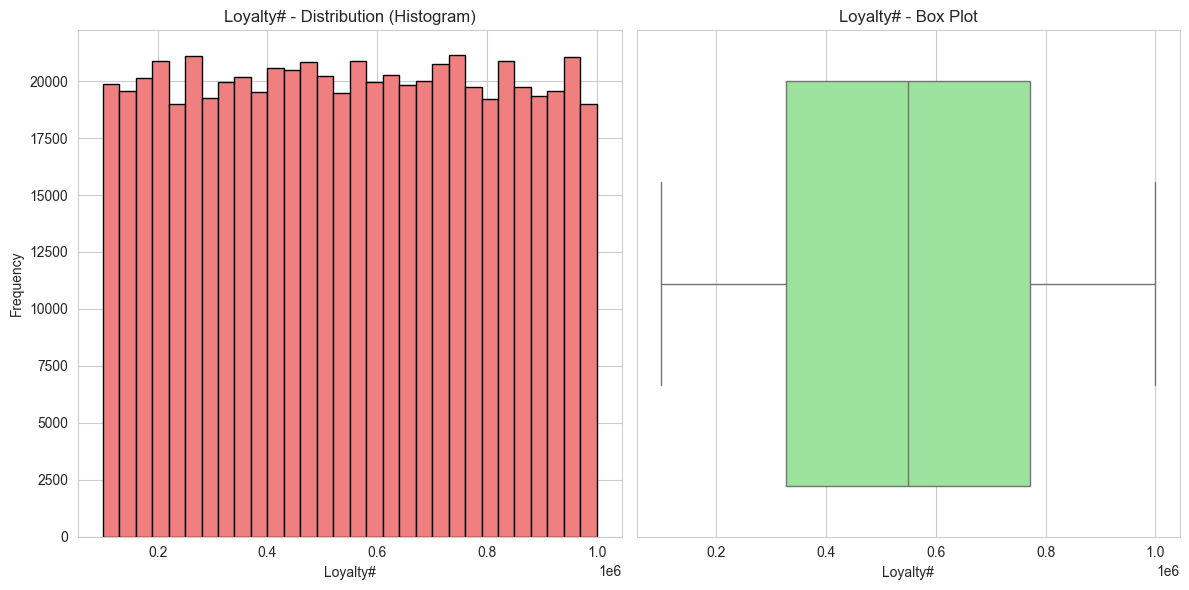

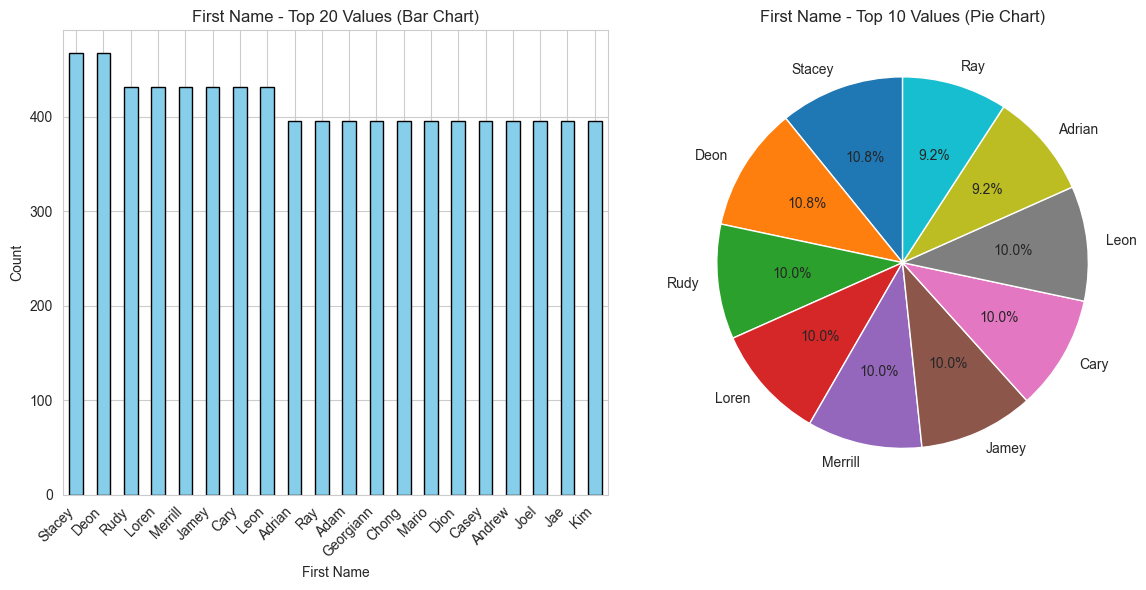

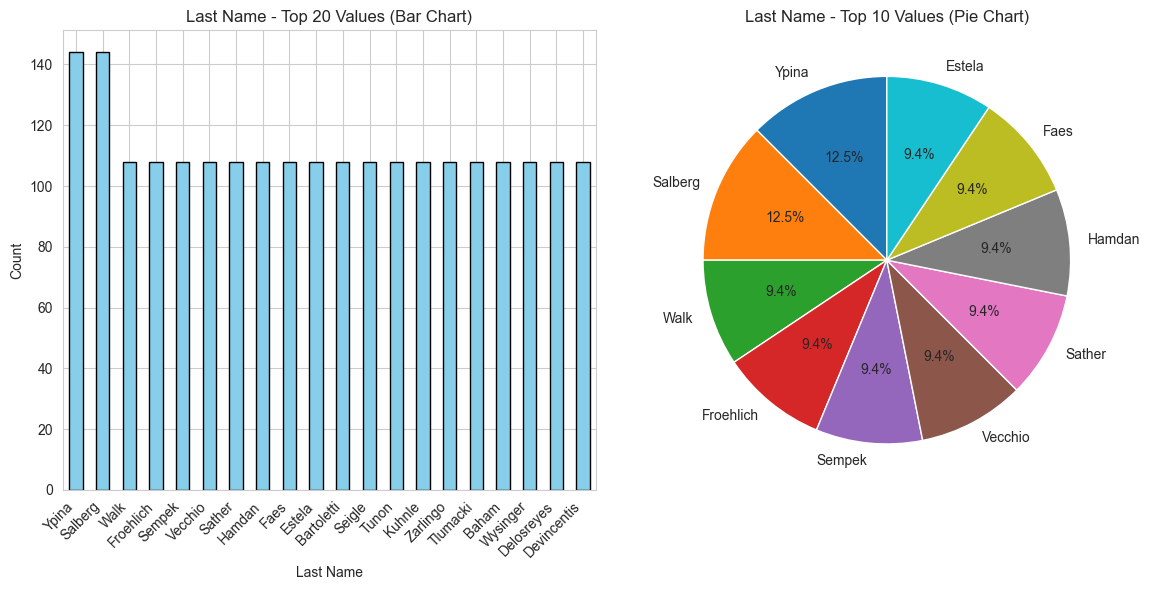

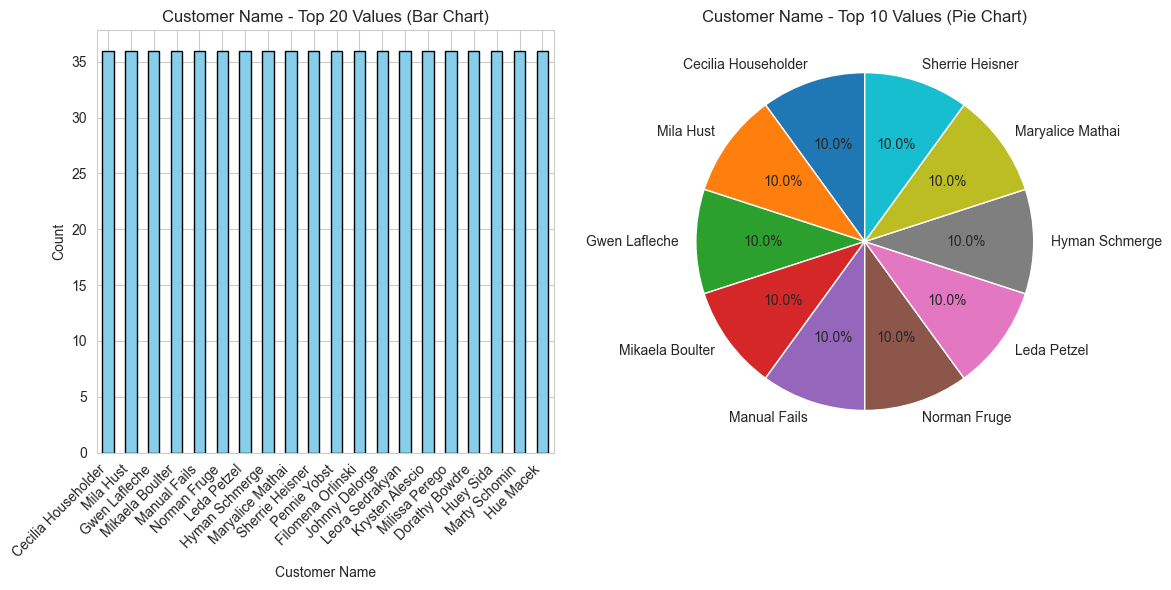

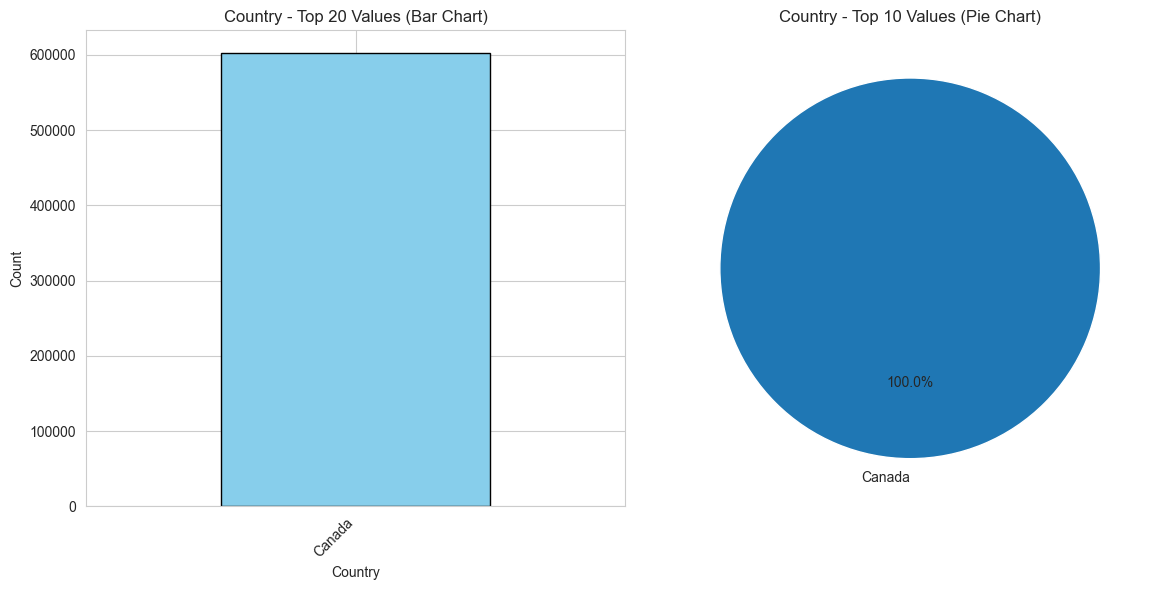

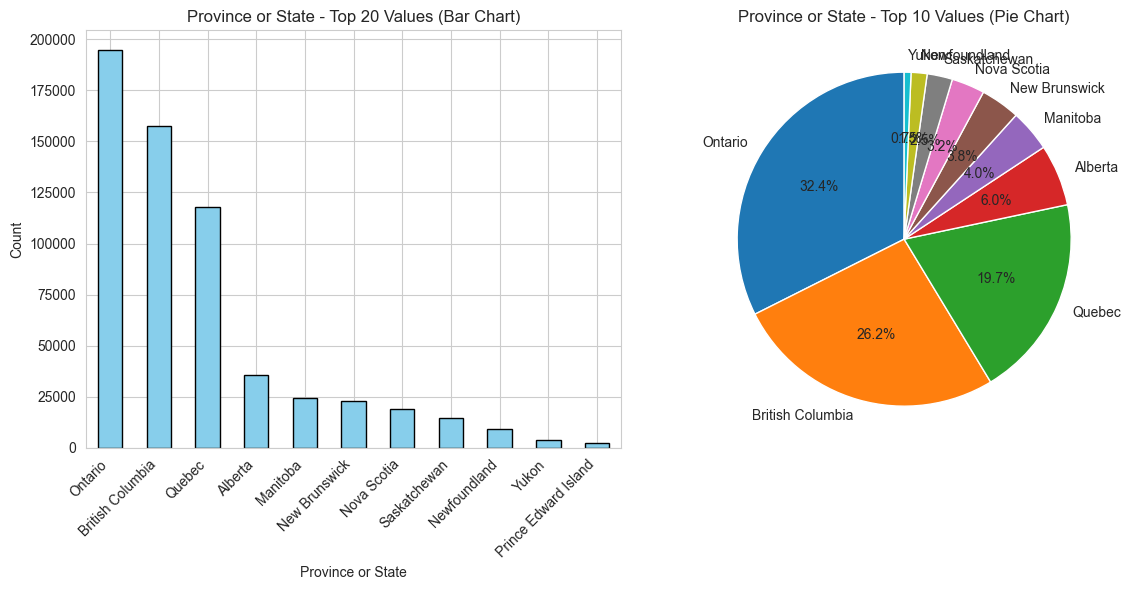

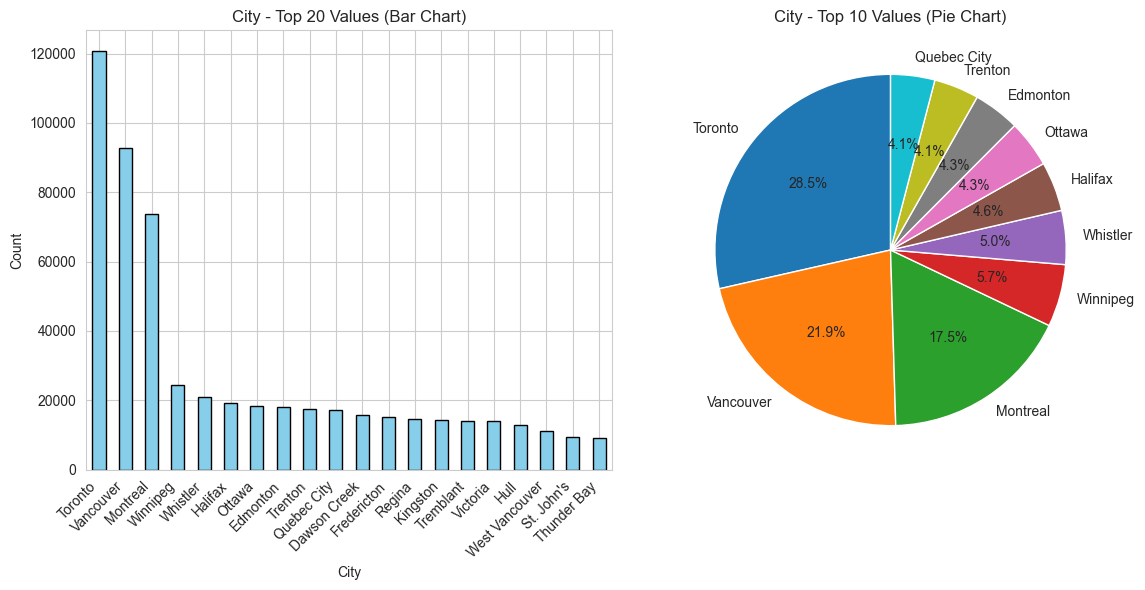

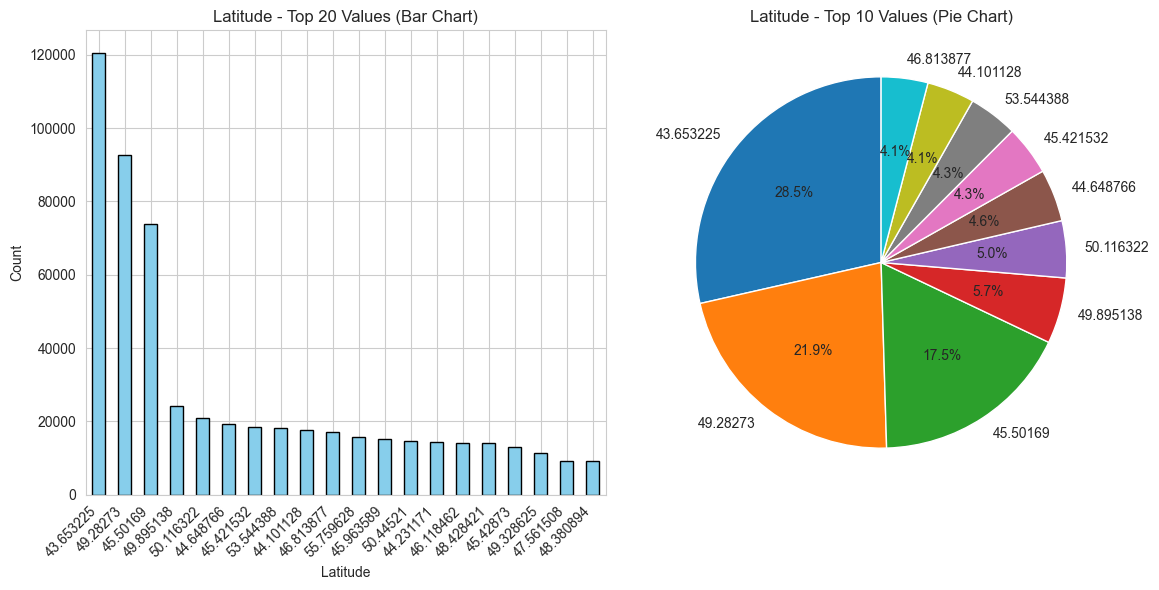

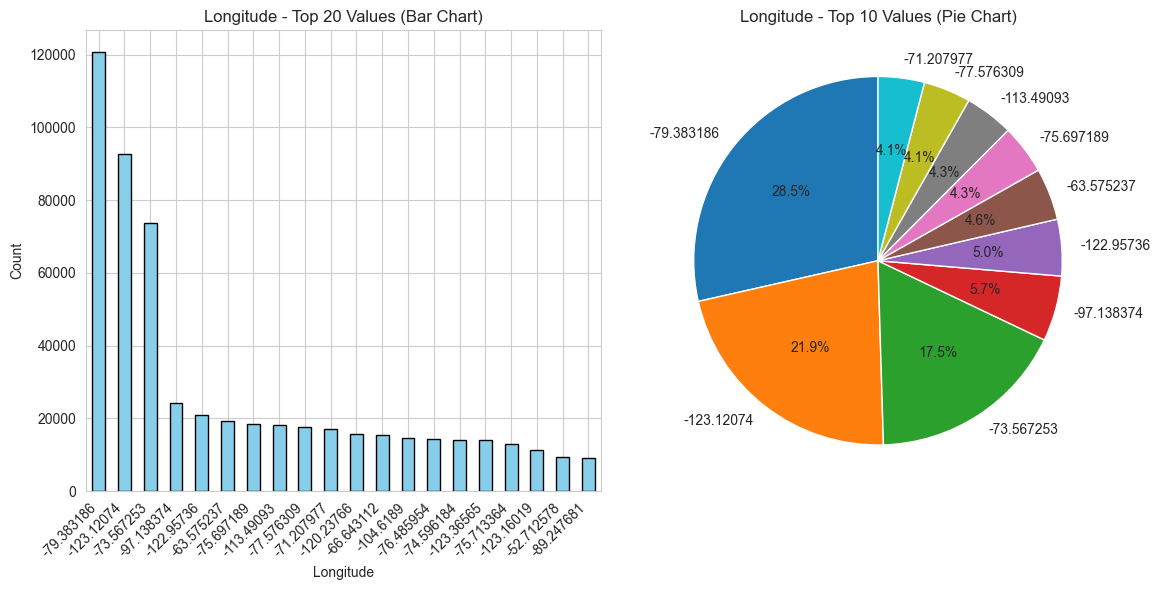

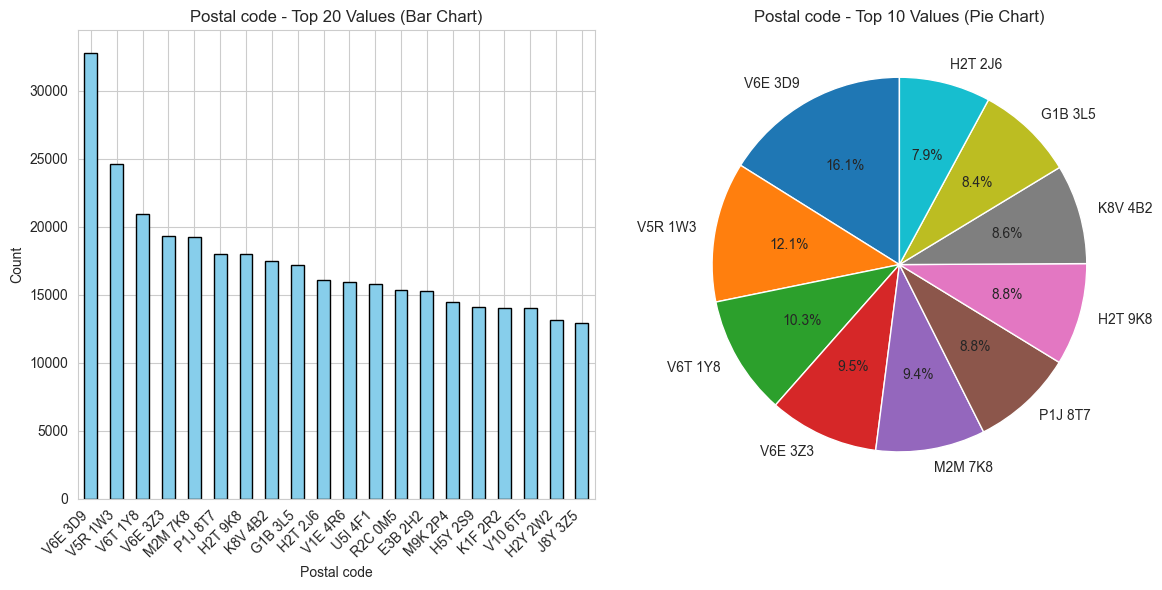

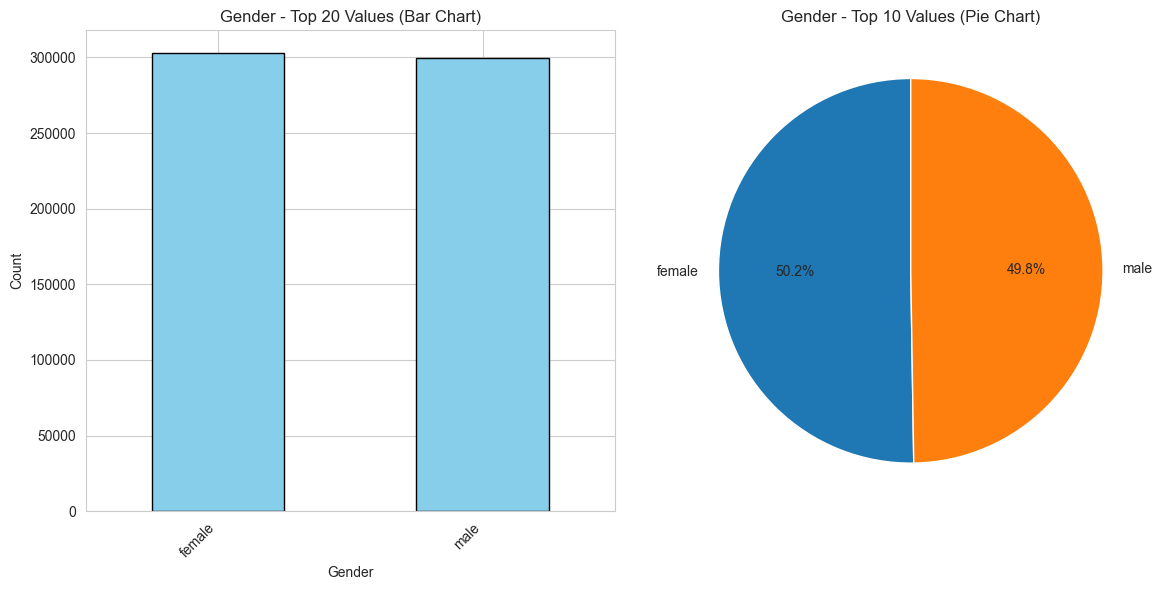

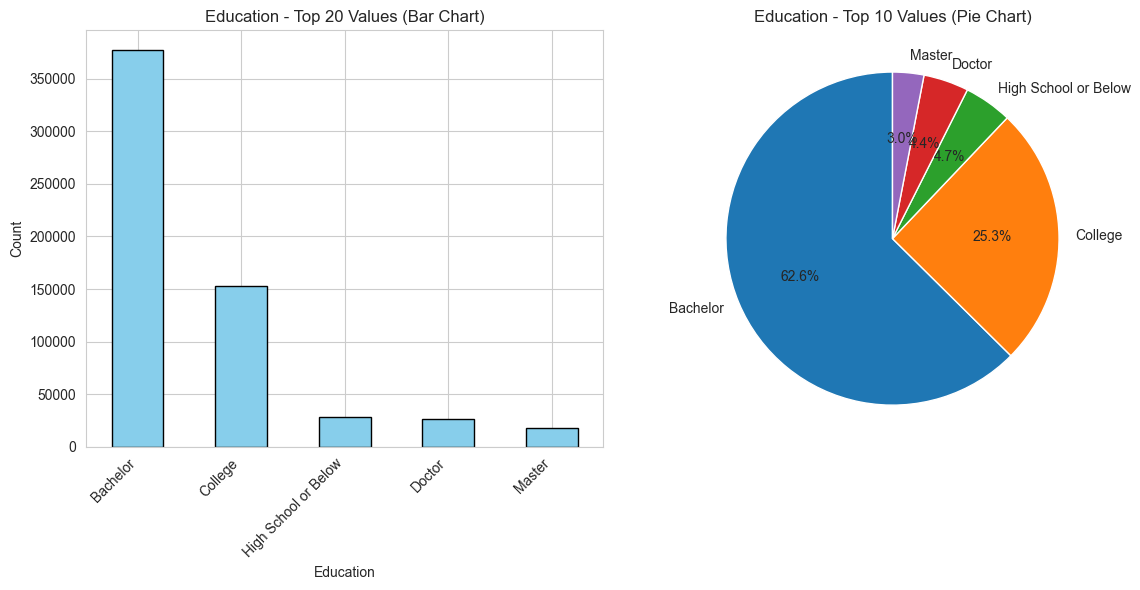

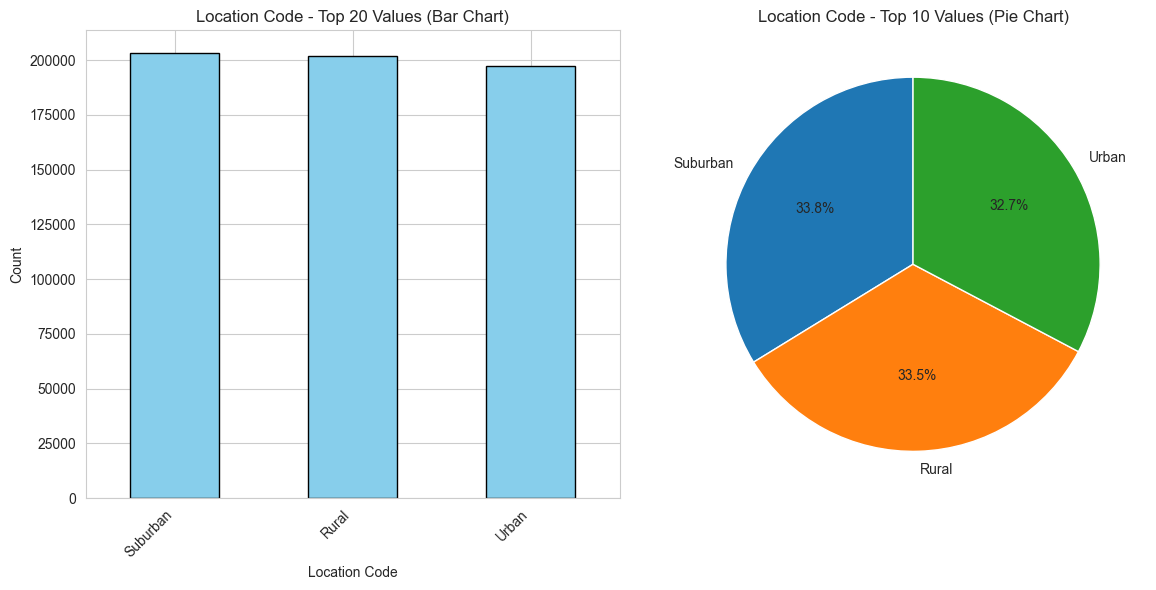

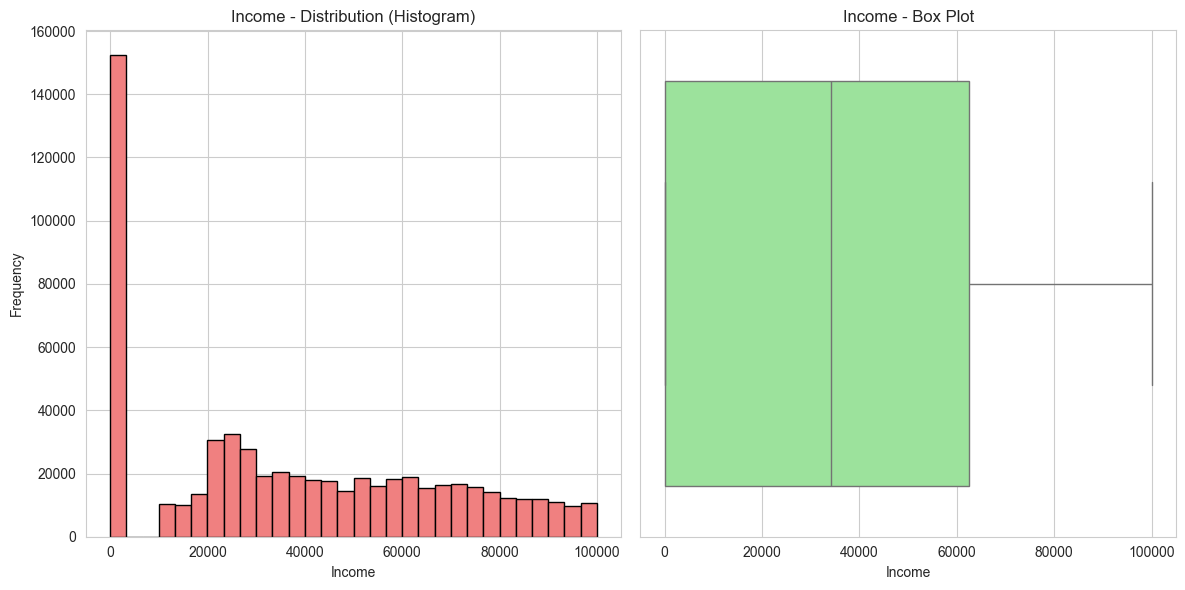

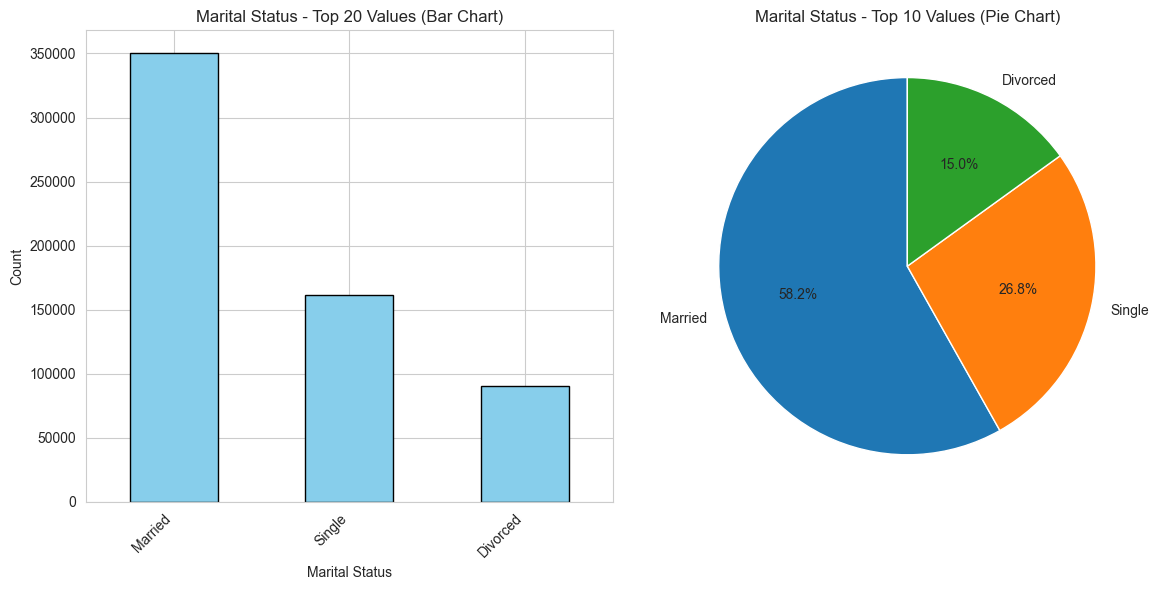

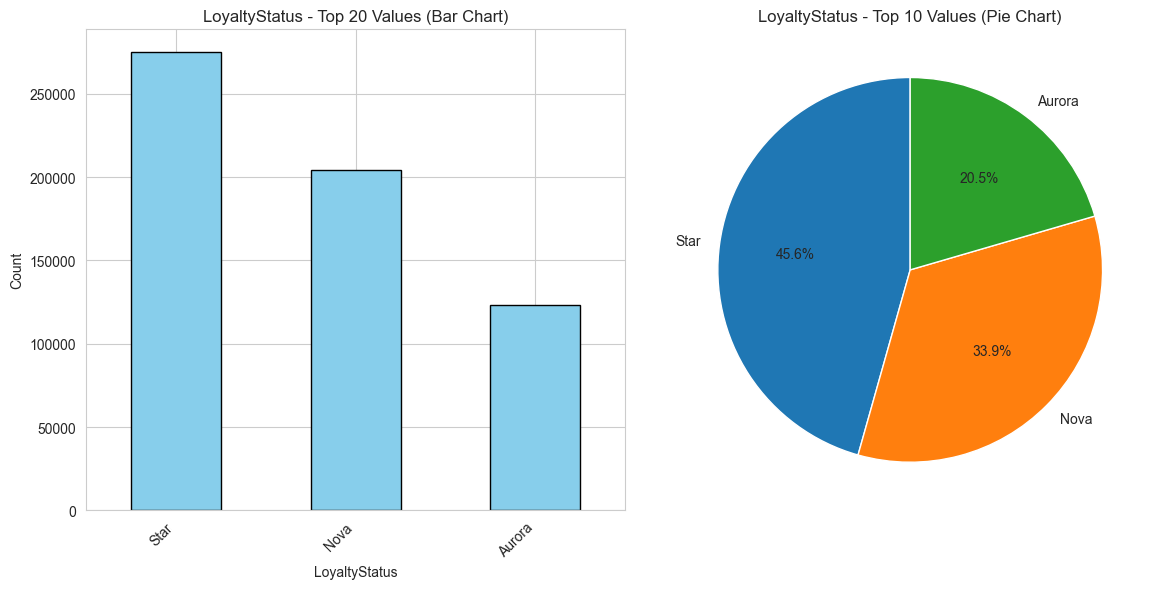

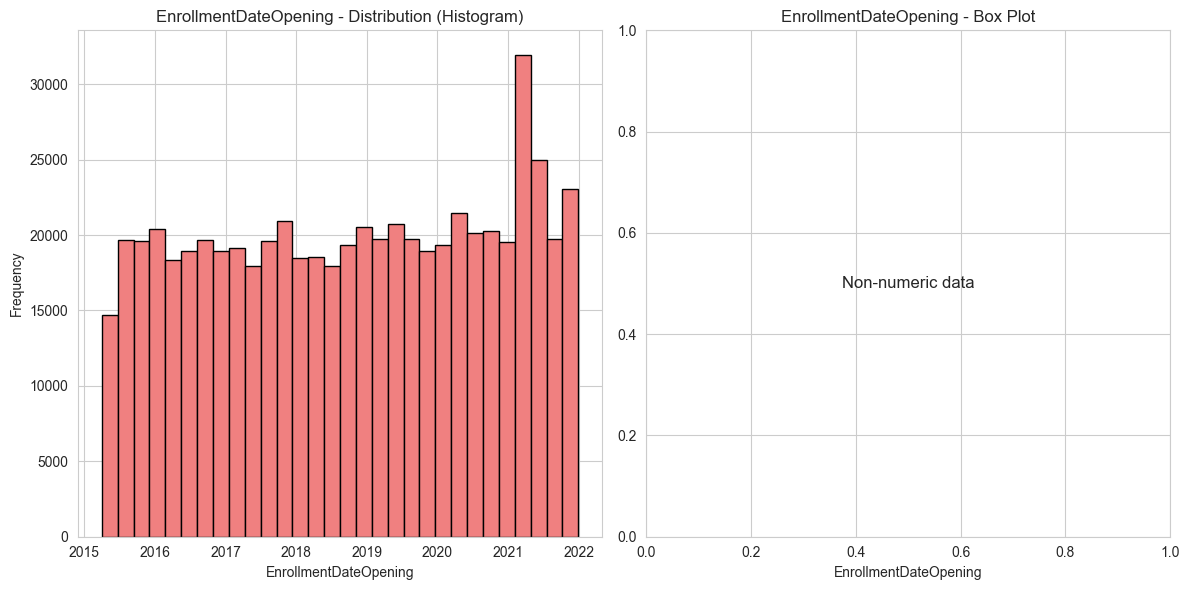

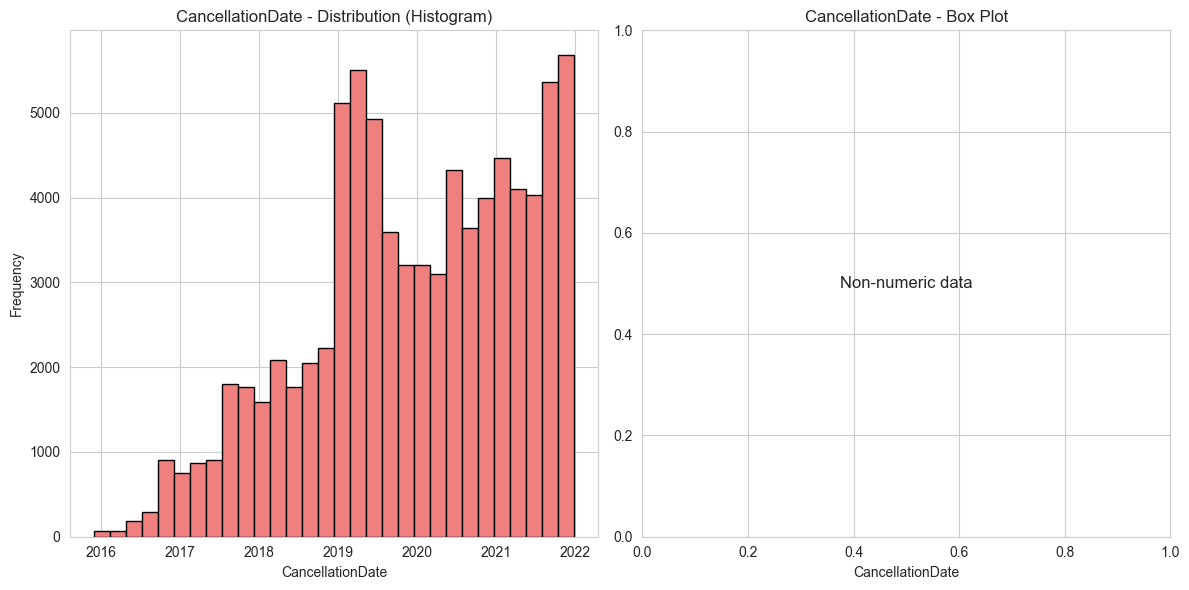

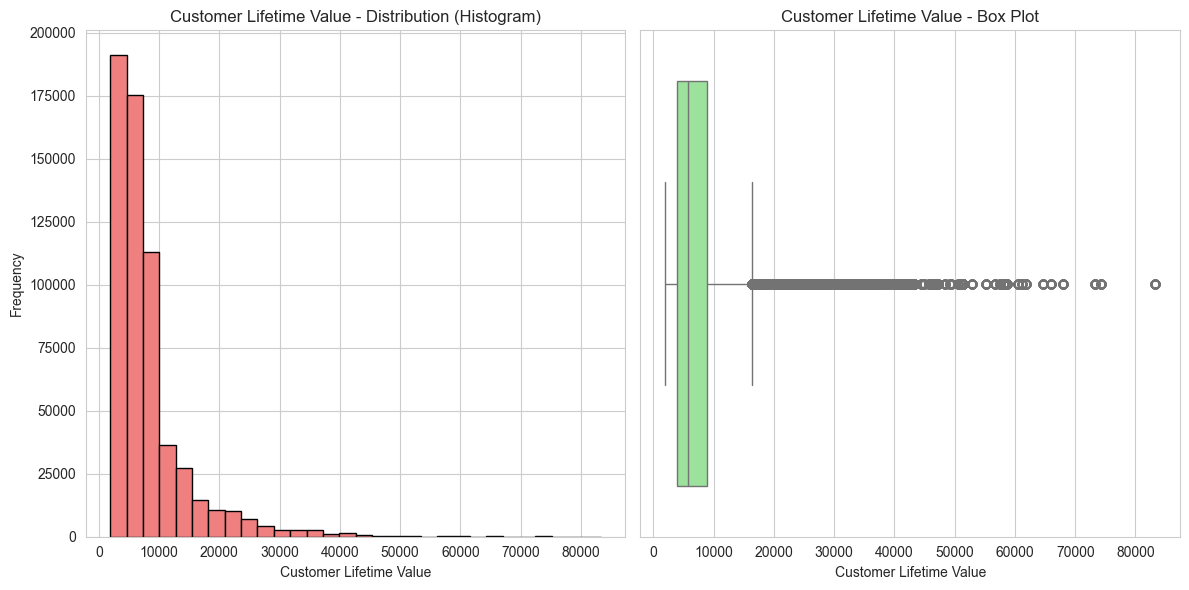

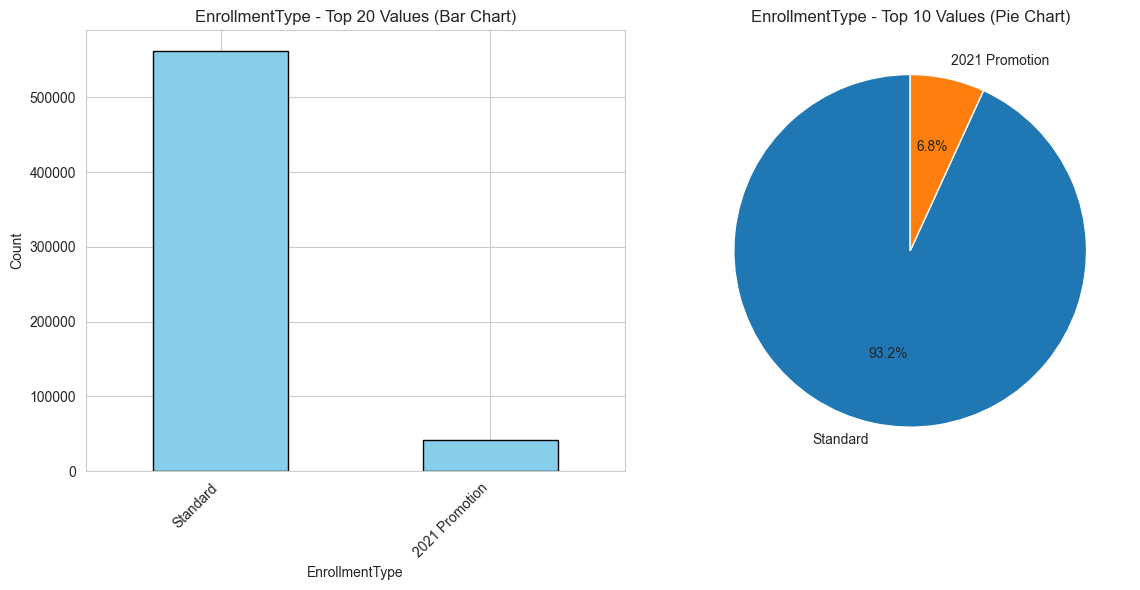

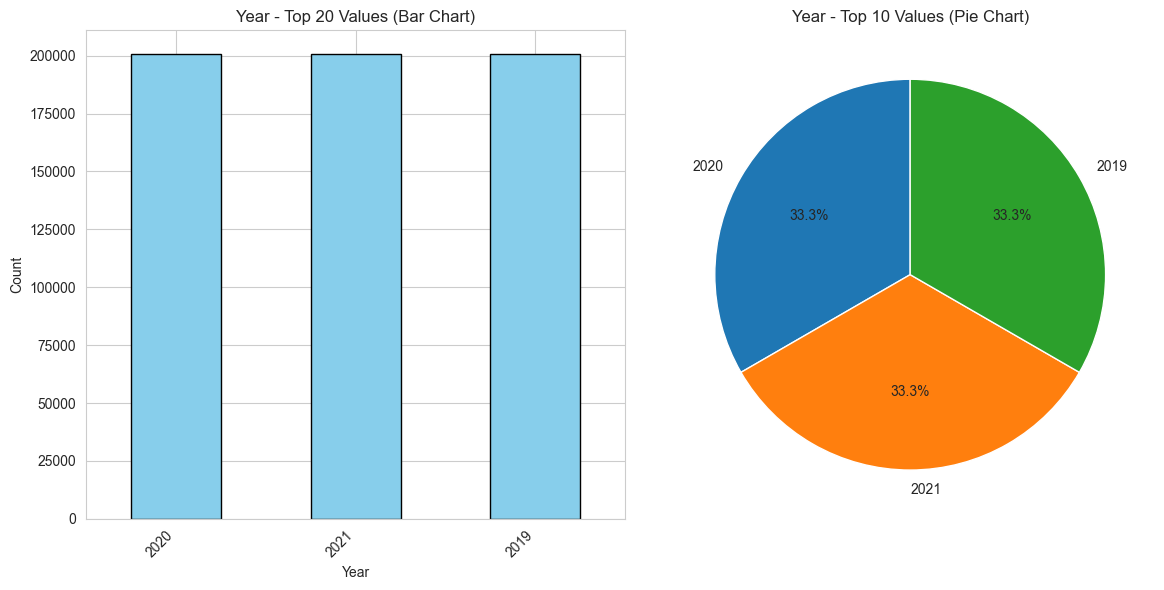

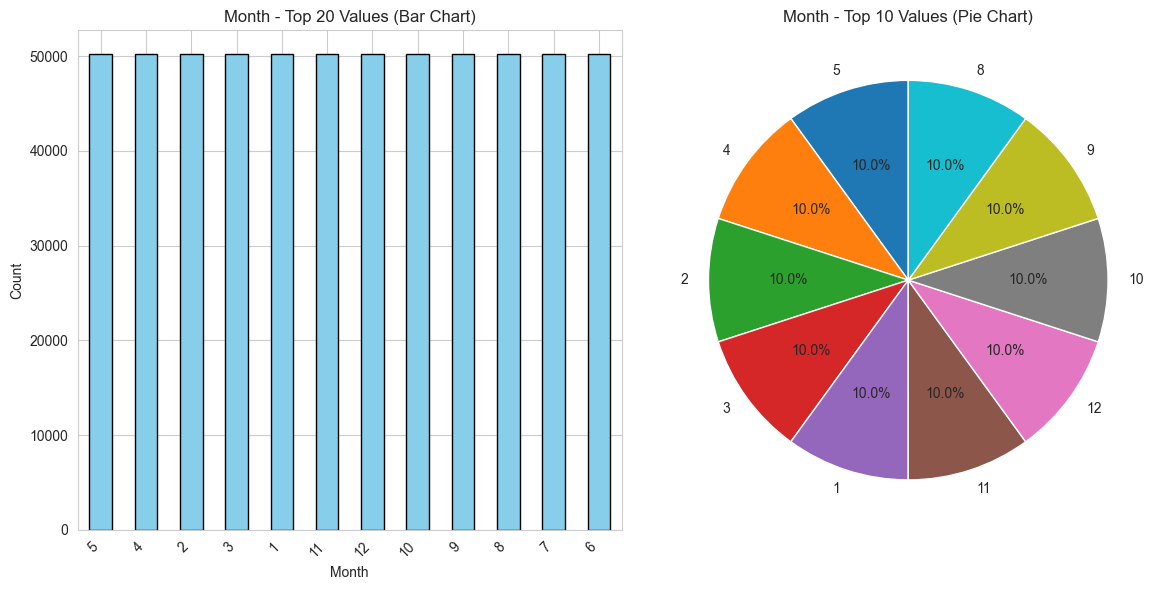

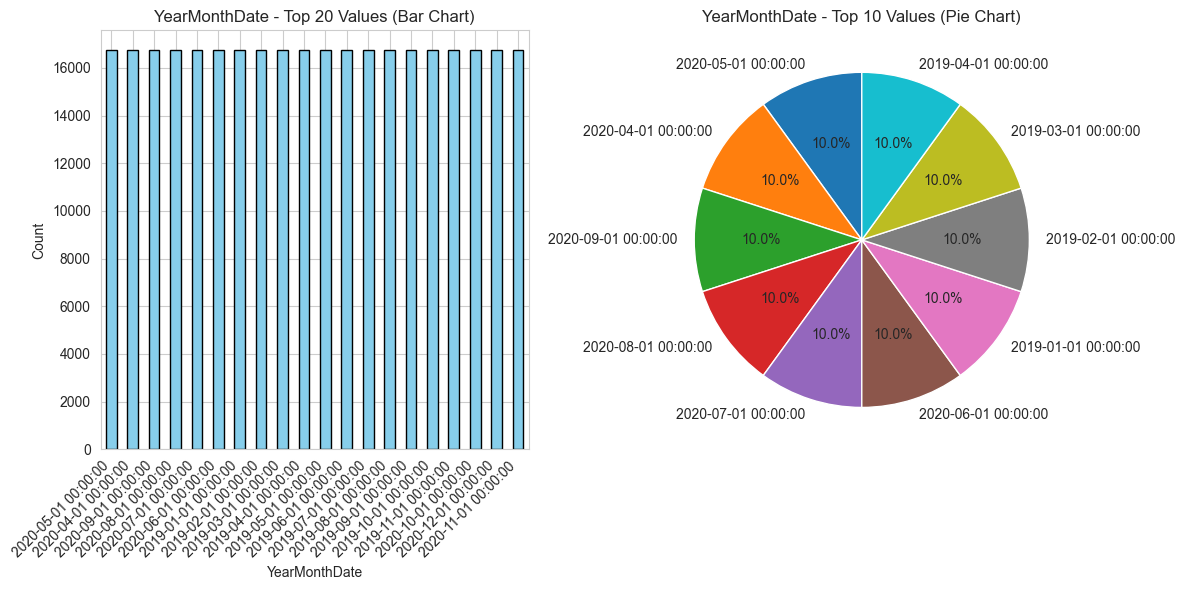

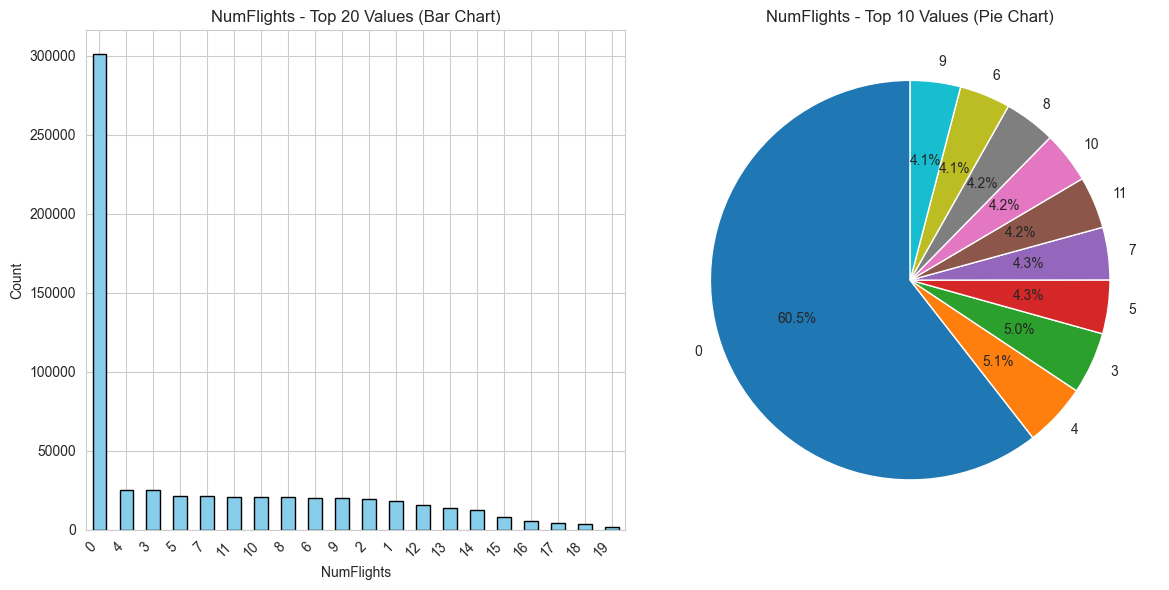

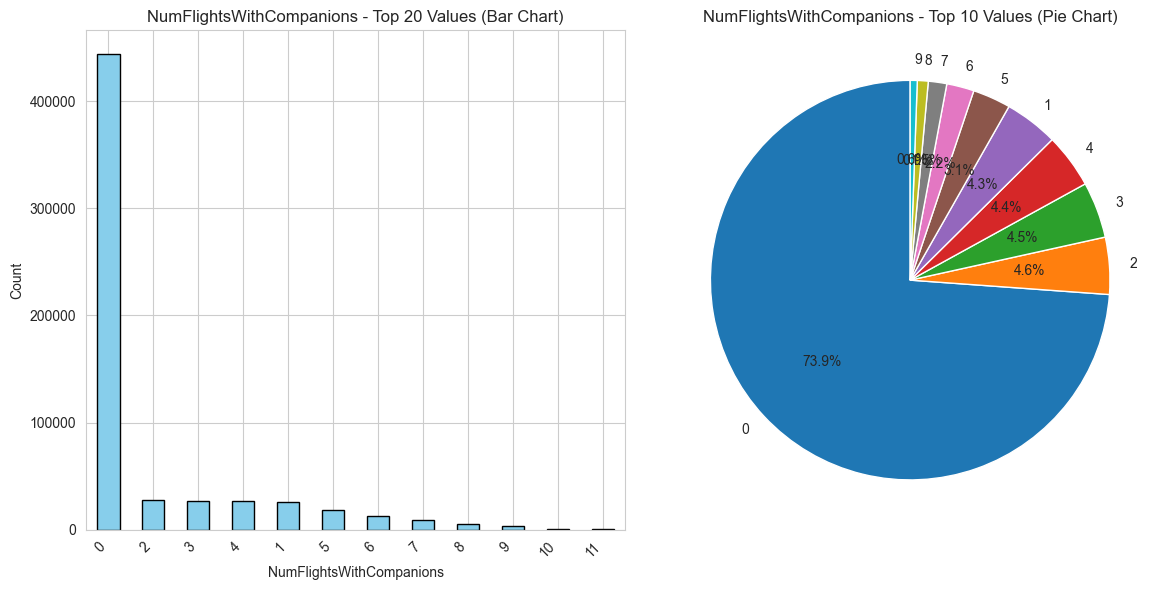

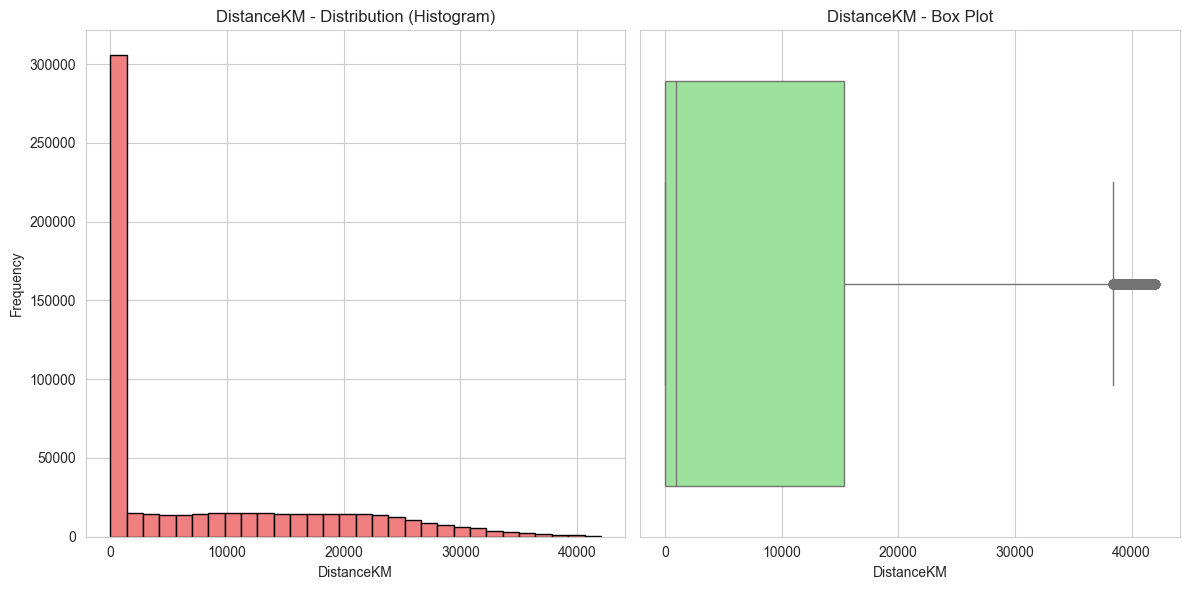

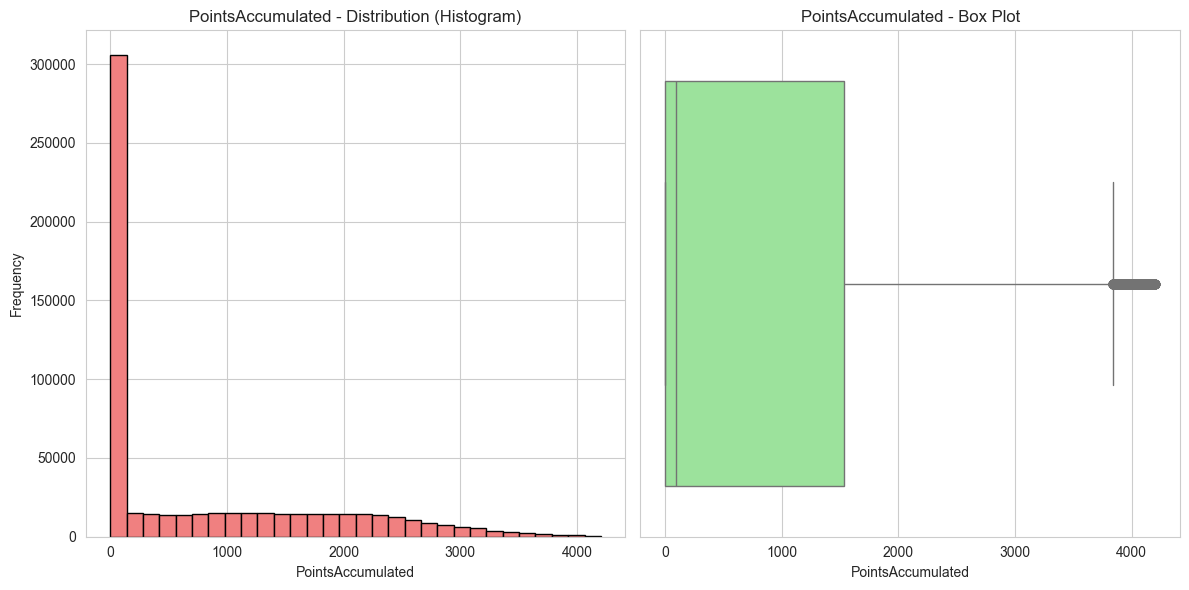

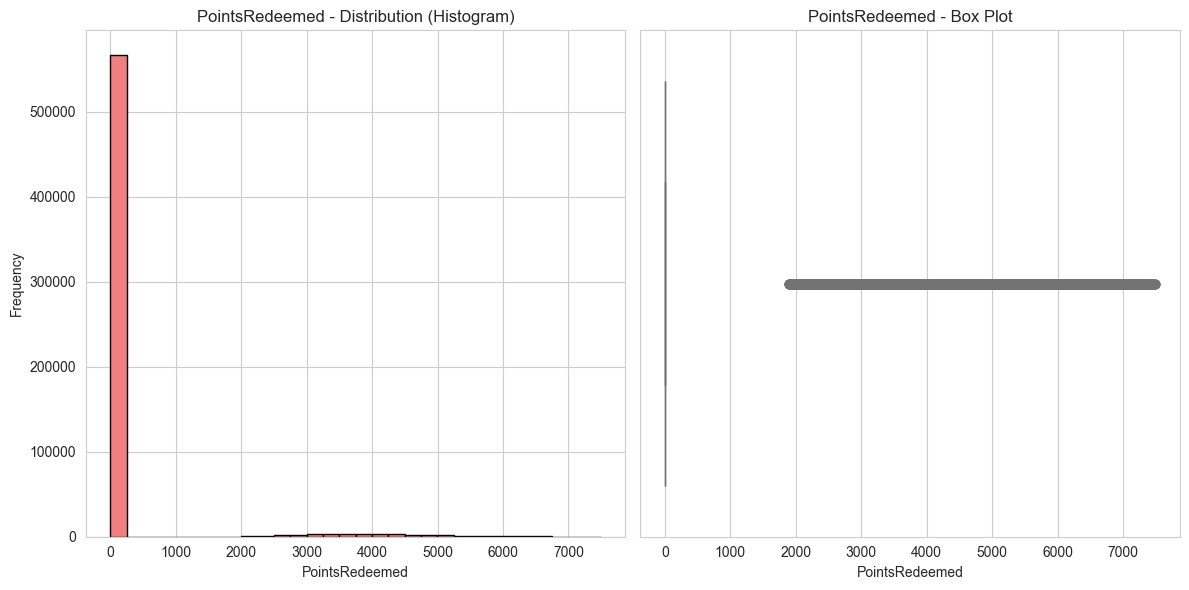

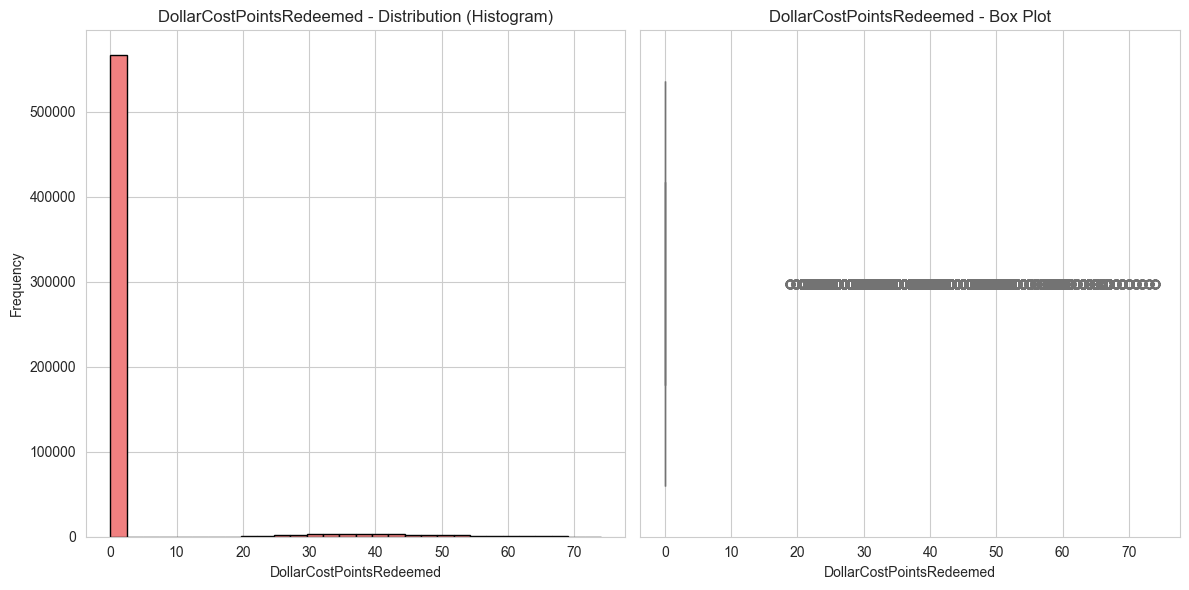

In [19]:
# Visualize distributions of all variables

# Create directory for plots
output_dir = 'Plots'
os.makedirs(output_dir, exist_ok=True)

# Plot distributions for each column
for column in df_final.columns:
    plt.figure(figsize=(12, 6))
    
    # For categorical/object columns or low cardinality
    if df_final[column].dtype == 'object' or df_final[column].nunique() < 50:
        value_counts = df_final[column].value_counts().head(20)
        
        # Bar plot
        plt.subplot(1, 2, 1)
        value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'{column} - Top 20 Values (Bar Chart)')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        
        # Pie chart for top 10
        plt.subplot(1, 2, 2)
        value_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'{column} - Top 10 Values (Pie Chart)')
        plt.ylabel('')
        
    # For numerical columns
    else:
        # Histogram
        plt.subplot(1, 2, 1)
        df_final[column].hist(bins=30, color='lightcoral', edgecolor='black')
        plt.title(f'{column} - Distribution (Histogram)')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Box plot
        plt.subplot(1, 2, 2)
        if pd.api.types.is_numeric_dtype(df_final[column]):
            sns.boxplot(x=df_final[column], color='lightgreen')
        else:
            plt.text(0.5, 0.5, 'Non-numeric data', fontsize=12, ha='center', va='center')
        plt.title(f'{column} - Box Plot')
        plt.xlabel(column)
    
    plt.tight_layout()
    
    # Save plot
    clean_column_name = column.replace(' ', '_').replace('#', 'num').replace('/', '_').replace('.', '_')
    filename = f'{output_dir}/{clean_column_name}_plot.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

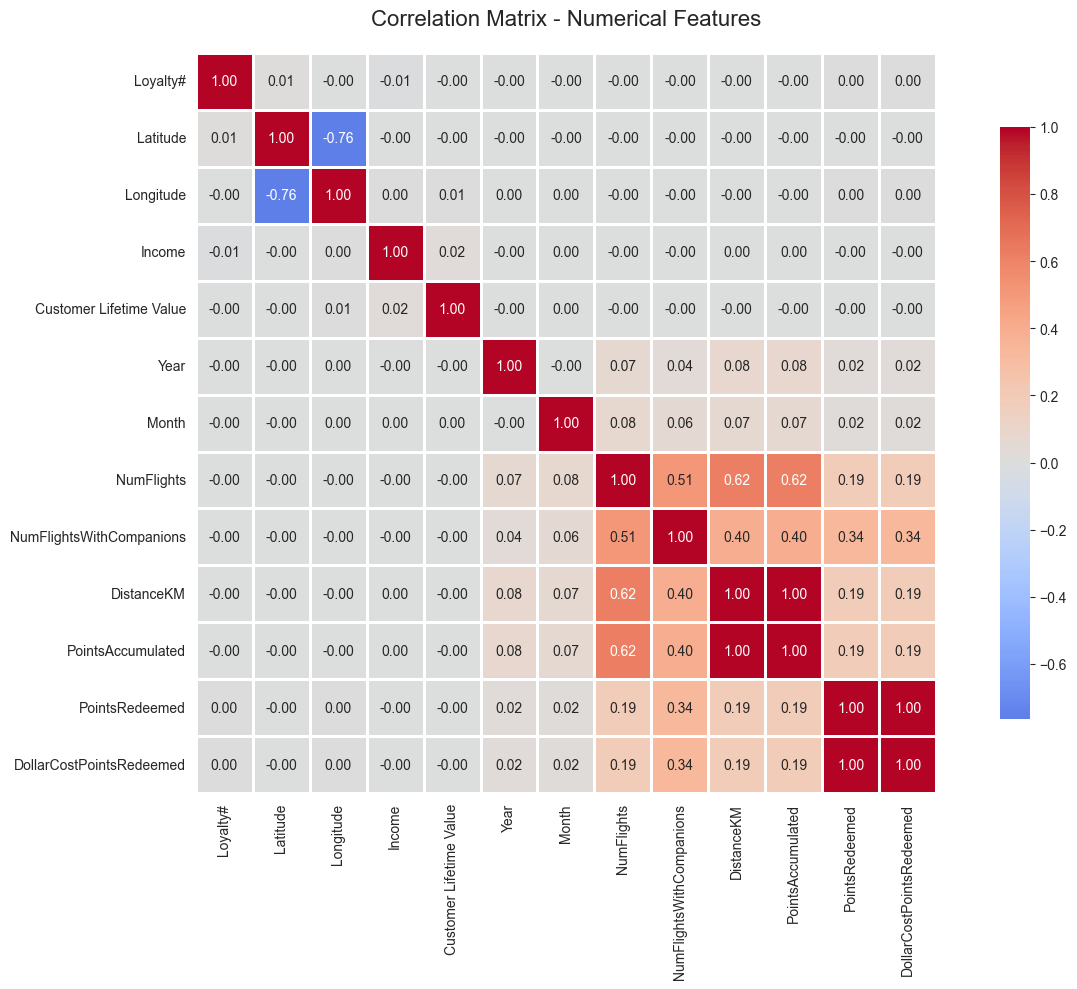

In [20]:
# Calculate correlation matrix for numerical features
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
correlation_matrix = df_final[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.savefig(f'{output_dir}/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

**Key Observations from Descriptive Statistics**:
- **Distribution patterns**: Income and CLV show strong right-skew, indicating a small segment of high-value customers
- **Outliers detected**: Flight distance and points accumulated contain extreme values requiring robust scaling
- **Categorical balance**: Education and marital status show reasonable distribution, while loyalty tiers may be imbalanced
- **Correlations**: Strong positive correlation between points accumulated and flight distance suggests travel intensity drives rewards

## 4. Feature Engineering

Creating derived variables that capture richer behavioral patterns and customer characteristics for more effective segmentation.

In [21]:
# Calculate average metrics per flight
df_final['avg_km_per_flight'] = df_final['DistanceKM'] / (df_final['NumFlights'] + 1)
df_final['avg_points_per_flight'] = df_final['PointsAccumulated'] / (df_final['NumFlights'] + 1)

display(df_final[['NumFlights', 'DistanceKM', 'avg_km_per_flight', 
                   'PointsAccumulated', 'avg_points_per_flight']].describe())

NumFlights     DistanceKM  avg_km_per_flight  PointsAccumulated  \
count    602532.0  602532.000000           602532.0      602532.000000   
mean     3.919969    7955.196144        1385.625846         795.362893   
std      5.064625   10263.557090        2711.524156        1026.232111   
min           0.0       0.000000                0.0           0.000000   
25%           0.0       0.000000                0.0           0.000000   
50%           1.0     919.000000         110.528182          91.845000   
75%           7.0   15367.000000        1815.169118        1536.322500   
max          21.0   42040.000000            40109.0        4204.000000   

       avg_points_per_flight  
count               602532.0  
mean              138.535111  
std               271.114588  
min                      0.0  
25%                      0.0  
50%                     11.0  
75%                    181.5  
max                   4010.0

In [22]:
# Ensure 'Points Redeemed' exists in df_flights before merging
if 'PointsRedeemed' in df_flights.columns:
    if 'PointsRedeemed' not in df_final.columns:
        df_final = pd.merge(df_final, df_flights[['Loyalty#', 'PointsRedeemed']], on='Loyalty#', how='left')

    # Calculate redemption behavior (redeemed vs accumulated)
    df_final['redemption_ratio'] = df_final['PointsRedeemed'] / (df_final['PointsAccumulated'] + 1)
    df_final['points_balance'] = df_final['PointsAccumulated'] - df_final['PointsRedeemed']

    display(df_final[['PointsAccumulated', 'PointsRedeemed', 
                       'redemption_ratio', 'points_balance']].describe())

PointsAccumulated  PointsRedeemed  redemption_ratio  points_balance
count      602532.000000   602532.000000     602532.000000   602532.000000
mean          795.362893      235.805094          0.352589      559.557799
std          1026.232111      984.379949          3.196012     1280.980208
min             0.000000        0.000000          0.000000    -7357.000000
25%             0.000000        0.000000          0.000000        0.000000
50%            91.845000        0.000000          0.000000        0.000000
75%          1536.322500        0.000000          0.000000     1348.000000
max          4204.000000     7496.000000        144.419355     4204.000000

In [23]:
# Calculate temporal features
df_final['active_days'] = (df_final['CancellationDate'].fillna(pd.Timestamp.now()) - 
                            df_final['EnrollmentDateOpening']).dt.days

# Recency: months since last flight activity
current_date = pd.Timestamp(df_final['Year'].max(), df_final['Month'].max(), 1)
df_final['months_since_flight'] = ((current_date.year - df_final['Year']) * 12 + 
                                    (current_date.month - df_final['Month']))

display(df_final[['EnrollmentDateOpening', 'active_days', 
                   'Year', 'Month', 'months_since_flight']].describe())

EnrollmentDateOpening    active_days           Year  \
count                         602532  602532.000000  602532.000000   
mean   2018-10-06 20:55:11.561211904    2293.613551    2020.000000   
min              2015-04-01 00:00:00   -1924.000000    2019.000000   
25%              2017-01-18 00:00:00    1679.000000    2019.000000   
50%              2018-11-02 00:00:00    2369.000000    2020.000000   
75%              2020-07-10 00:00:00    3141.000000    2021.000000   
max              2021-12-30 00:00:00    3869.000000    2021.000000   
std                              NaN    1044.818828       0.816497   

               Month  months_since_flight  
count  602532.000000        602532.000000  
mean        6.500000            17.500000  
min         1.000000             0.000000  
25%         3.750000             8.750000  
50%         6.500000            17.500000  
75%         9.250000            26.250000  
max        12.000000            35.000000  
std         3.452055            10.388303

In [24]:
# Calculate companion ratio (traveling with others)
df_final['companion_ratio'] = df_final['NumFlightsWithCompanions'] / (df_final['NumFlights'] + 1)

display(df_final[['NumFlights', 'NumFlightsWithCompanions', 'companion_ratio']].describe())

NumFlights  NumFlightsWithCompanions  companion_ratio
count    602532.0                  602532.0         602532.0
mean     3.919969                  0.988193         0.126454
std      5.064625                  1.994808         0.242593
min           0.0                       0.0              0.0
25%           0.0                       0.0              0.0
50%           1.0                       0.0              0.0
75%           7.0                       1.0         0.111111
max          21.0                      11.0         0.916667

In [25]:
# Calculate value-to-activity ratios
df_final['clv_per_flight'] = df_final['Customer Lifetime Value'] / (df_final['NumFlights'] + 1)
df_final['clv_to_salary_ratio'] = df_final['Customer Lifetime Value'] / (df_final['Income'] + 1)

display(df_final[['Customer Lifetime Value', 'NumFlights', 'Income',
                   'clv_per_flight', 'clv_to_salary_ratio']].describe())

Customer Lifetime Value  NumFlights         Income  clv_per_flight  \
count            602532.000000    602532.0  602532.000000        602532.0   
mean               7988.896536    3.919969   37749.877696     4648.379483   
std                6860.783006    5.064625   30369.454458     6077.837521   
min                1898.010000         0.0       0.000000       90.413333   
25%                3980.840000         0.0       0.000000          773.96   
50%                5780.180000         1.0   34148.000000     2674.996667   
75%                8940.580000         7.0   62396.000000         5989.77   
max               83325.380000        21.0   99981.000000        83325.38   

       clv_to_salary_ratio  
count        602532.000000  
mean           1923.192432  
std            4671.427384  
min               0.024845  
25%               0.095576  
50%               0.200411  
75%            2124.170000  
max           74228.520000

In [26]:
# Dictionary to map loyalty tiers to numeric values
loyalty_mapping = {'Star': 1, 'Nova': 2, 'Aurora': 3}
df_final['loyalty_tier_numeric'] = df_final['LoyaltyStatus'].map(loyalty_mapping)

df_final.groupby(['LoyaltyStatus', 'loyalty_tier_numeric']).size()

LoyaltyStatus  loyalty_tier_numeric
Aurora         3                       123444
Nova           2                       204156
Star           1                       274932
dtype: int64

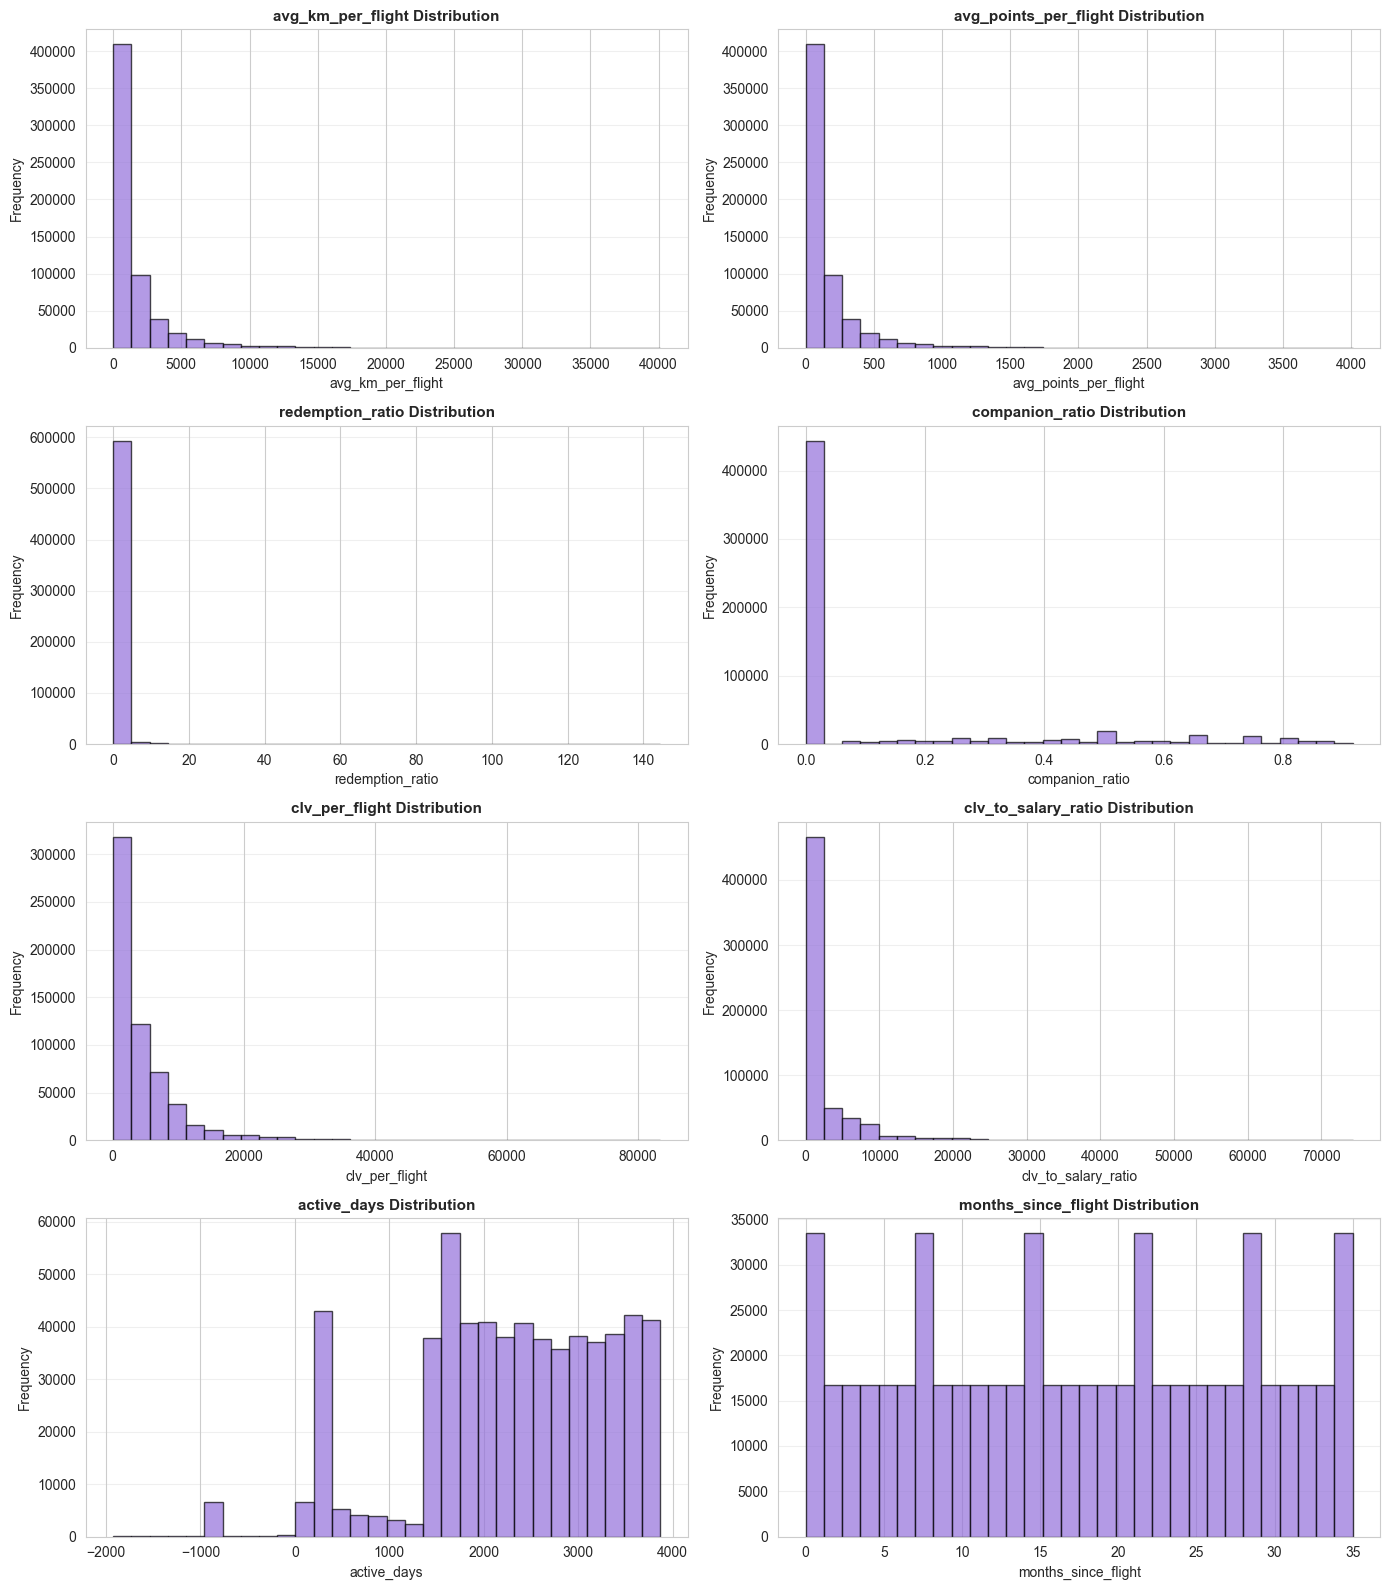

✓ Engineered features visualized and saved


In [27]:
# Visualize engineered features distributions
engineered_features = [
    'avg_km_per_flight', 'avg_points_per_flight', 'redemption_ratio',
    'companion_ratio', 'clv_per_flight', 'clv_to_salary_ratio',
    'active_days', 'months_since_flight'
]

fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.ravel()

for idx, feature in enumerate(engineered_features):
    if feature in df_final.columns:
        axes[idx].hist(df_final[feature].dropna(), bins=30, color='mediumpurple', 
                      edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(f'{output_dir}/engineered_features_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Engineered features visualized and saved")

**Feature Engineering Rationale**:

1. **avg_km_per_flight**: Distinguishes short-haul frequent travelers from long-haul occasional travelers
2. **redemption_ratio**: Identifies savers (low ratio) vs. spenders (high ratio) among loyal customers
3. **active_days**: Captures customer tenure and long-term engagement with the program
4. **companion_ratio**: Reveals solo business travelers vs. leisure family travelers
5. **clv_per_flight**: Measures value contribution per trip, identifying premium vs. budget customers
6. **clv_to_salary_ratio**: Uncovers customers who overspend relative to income (aspirational segment)
7. **months_since_flight**: Recency metric for identifying dormant or at-risk customers
8. **avg_points_per_flight**: Indicates preference for point-earning routes or fare classes

These engineered variables capture multi-dimensional behavioral patterns beyond raw counts, enabling more nuanced customer segmentation.

## 5. Behavioral Insights for Segmentation

Exploring relationships between features to identify preliminary customer groups and validate segmentation potential.

C:\Users\diogo\AppData\Local\Temp\ipykernel_35612\2794463748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LoyaltyStatus', y='Customer Lifetime Value', data=df_final,


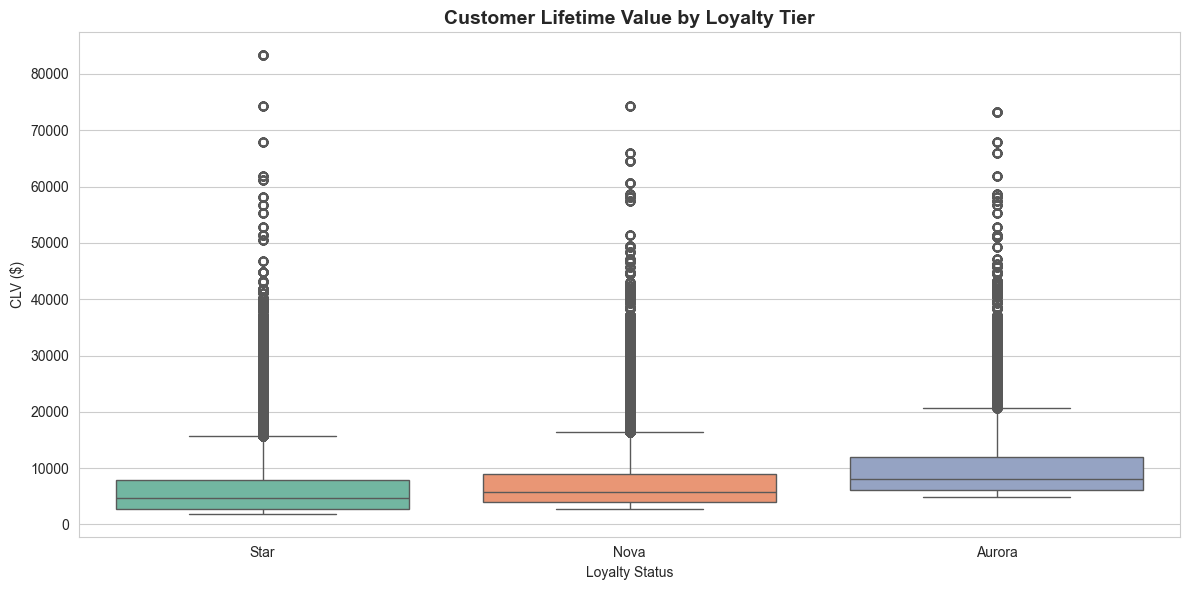

                  count          mean          std      min      25%      50%  \
LoyaltyStatus                                                                   
Aurora         123444.0  10672.686325  7527.846163  4936.89  6063.20  8140.00   
Nova           204156.0   8045.615995  6699.636840  2738.00  4015.34  5799.06   
Star           274932.0   6741.761372  6292.222640  1898.01  2725.32  4786.89   

                    75%       max  
LoyaltyStatus                      
Aurora         11895.18  73225.96  
Nova            8962.80  74228.52  
Star            7897.02  83325.38  


In [28]:
# Compare customer lifetime value across loyalty tiers
plt.figure(figsize=(12, 6))
sns.boxplot(x='LoyaltyStatus', y='Customer Lifetime Value', data=df_final, 
            order=['Star', 'Nova', 'Aurora'], palette='Set2')
plt.title('Customer Lifetime Value by Loyalty Tier', fontsize=14, fontweight='bold')
plt.xlabel('Loyalty Status')
plt.ylabel('CLV ($)')
plt.tight_layout()
plt.savefig(f'{output_dir}/clv_by_loyalty_tier.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical summary
print(df_final.groupby('LoyaltyStatus')['Customer Lifetime Value'].describe())

C:\Users\diogo\AppData\Local\Temp\ipykernel_35612\1705207185.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='NumFlights', data=df_final, ax=axes[0], palette='muted')
C:\Users\diogo\AppData\Local\Temp\ipykernel_35612\1705207185.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\diogo\AppData\Local\Temp\ipykernel_35612\1705207185.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education', y='DistanceKM', data=df_final, ax=axes[1], palette='muted')
C:\Users\diogo\AppData\Local\Temp\ipykernel_35612

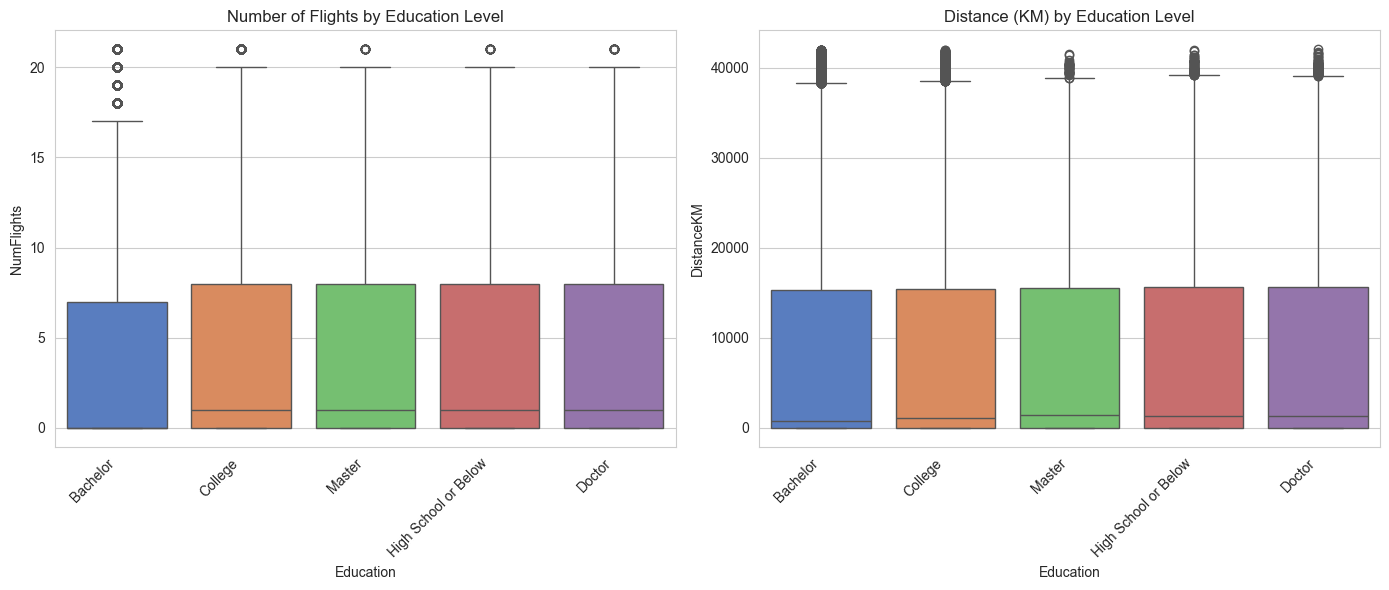

In [29]:
# Compare flight patterns across education levels
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Education', y='NumFlights', data=df_final, ax=axes[0], palette='muted')
axes[0].set_title('Number of Flights by Education Level')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.boxplot(x='Education', y='DistanceKM', data=df_final, ax=axes[1], palette='muted')
axes[1].set_title('Distance (KM) by Education Level')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig(f'{output_dir}/flight_behavior_by_education.png', dpi=300, bbox_inches='tight')
plt.show()

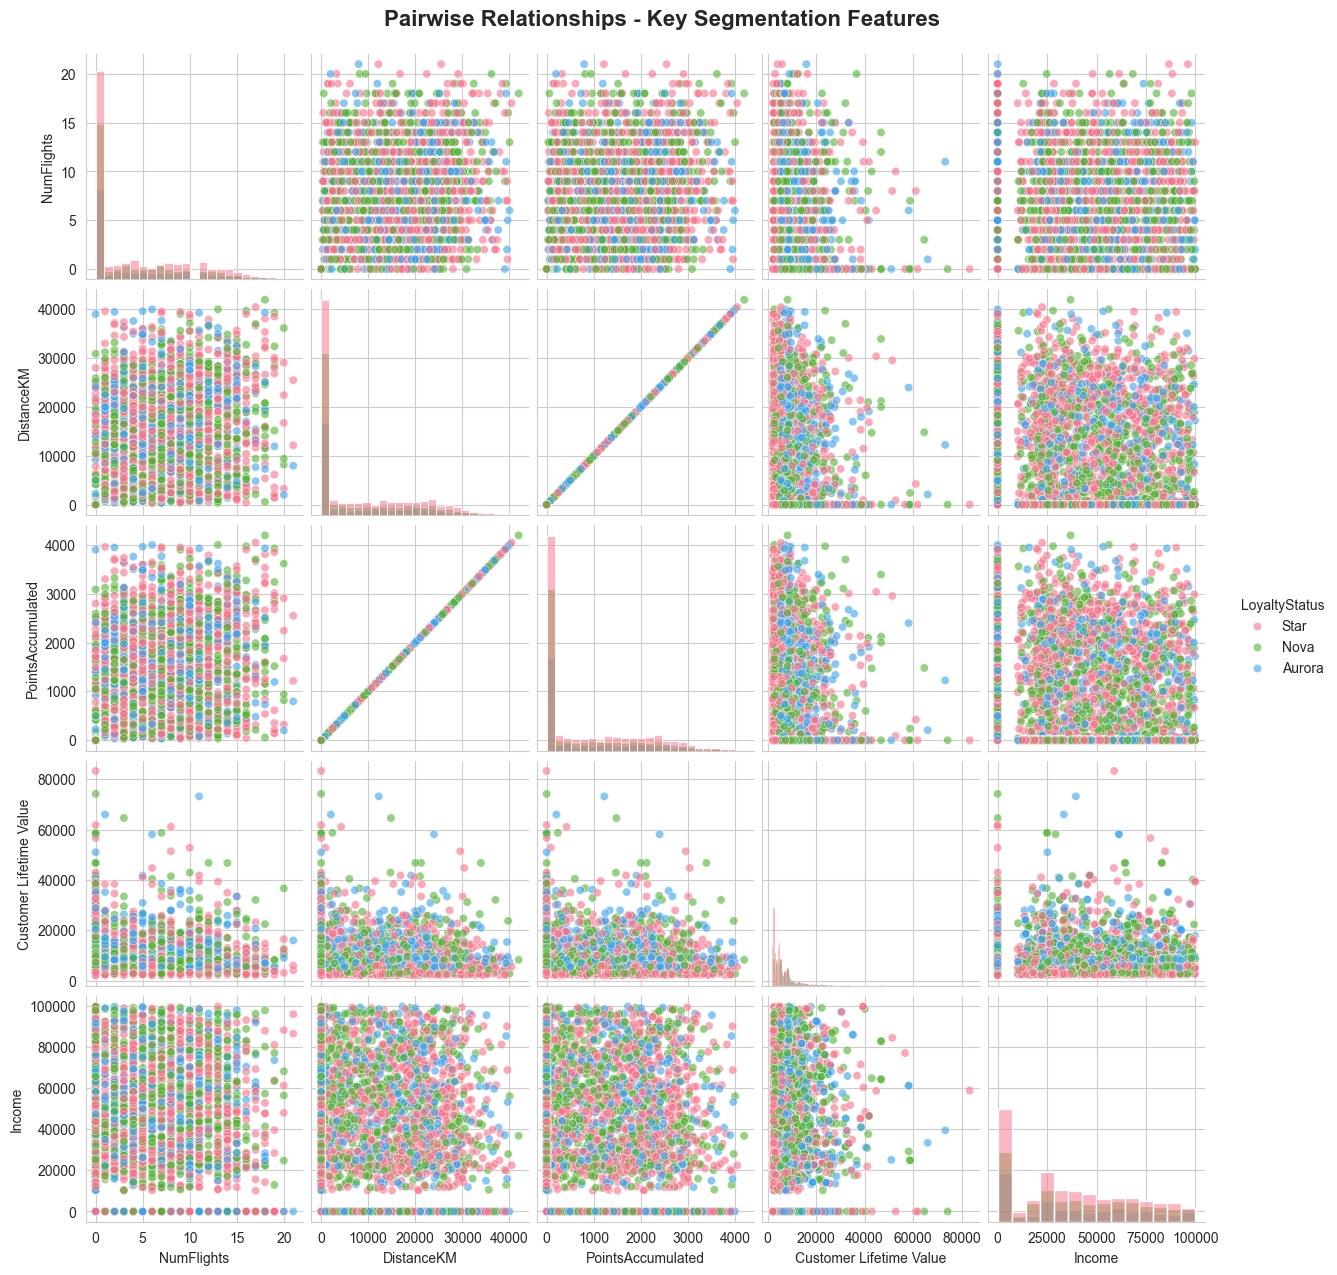

✓ Pairplot reveals potential clustering structure


In [30]:
# Multi-dimensional visualization to identify natural clusters
key_features = ['NumFlights', 'DistanceKM', 'PointsAccumulated', 
                'Customer Lifetime Value', 'Income']

# Sample for performance (if dataset is large)
sample_size = min(5000, len(df_final))
df_sample = df_final[key_features + ['LoyaltyStatus']].sample(n=sample_size, random_state=42)

pairplot = sns.pairplot(df_sample, hue='LoyaltyStatus', palette='husl', 
                        plot_kws={'alpha': 0.6}, diag_kind='hist')
pairplot.fig.suptitle('Pairwise Relationships - Key Segmentation Features', 
                       y=1.02, fontsize=16, fontweight='bold')
plt.savefig(f'{output_dir}/pairplot_segmentation_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Pairplot reveals potential clustering structure")

C:\Users\diogo\AppData\Local\Temp\ipykernel_35612\1709579424.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='LoyaltyStatus', y='redemption_ratio', data=df_final,


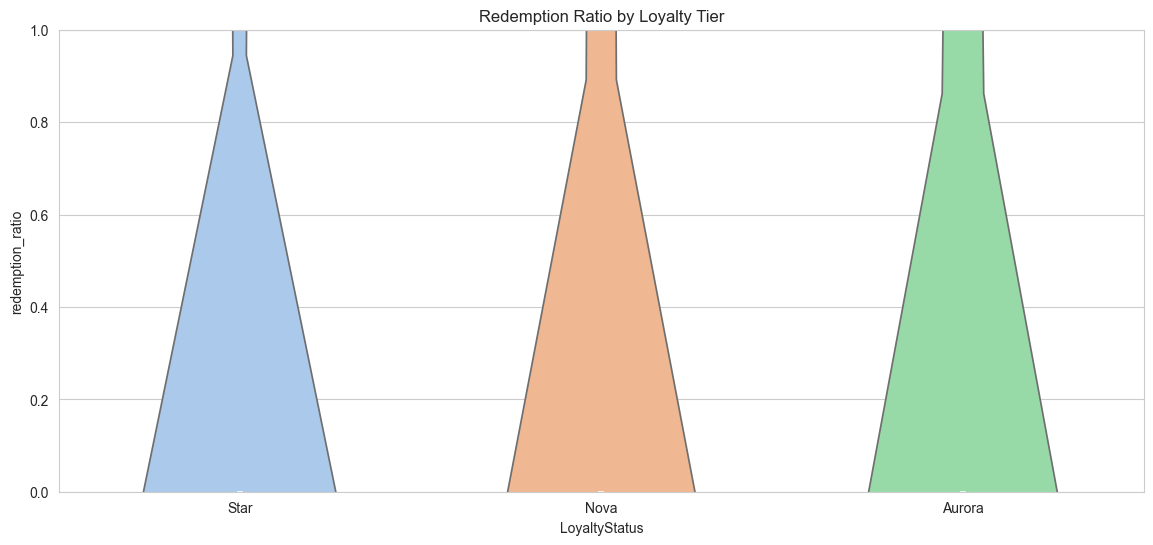

In [35]:
# Compare redemption patterns and companion behavior
fig, axes = plt.subplots(1, figsize=(14, 6))

# Redemption ratio by loyalty tier
sns.violinplot(x='LoyaltyStatus', y='redemption_ratio', data=df_final, 
               order=['Star', 'Nova', 'Aurora'], ax=axes, palette='pastel')
axes.set_title('Redemption Ratio by Loyalty Tier')
axes.set_ylim(0, 1)

plt.savefig(f'{output_dir}/behavioral_patterns_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [36]:
# Create preliminary segments based on RFM-style logic
def assign_preliminary_segment(row):
    if row['months_since_flight'] <= 3 and row['NumFlights'] >= 10 and row['Customer Lifetime Value'] >= df_final['Customer Lifetime Value'].quantile(0.75):
        return 'VIP Active'
    elif row['months_since_flight'] <= 6 and row['NumFlights'] >= 5:
        return 'Regular Active'
    elif row['months_since_flight'] > 12:
        return 'Dormant'
    elif row['NumFlights'] < 3:
        return 'Occasional'
    else:
        return 'Moderate'

df_final['preliminary_segment'] = df_final.apply(assign_preliminary_segment, axis=1)

# Visualize preliminary segments
segment_summary = df_final.groupby('preliminary_segment').agg({
    'Loyalty#': 'count',
    'Customer Lifetime Value': 'mean',
    'NumFlights': 'mean',
    'DistanceKM': 'mean',
    'redemption_ratio': 'mean'
}).round(2)

segment_summary.columns = ['Count', 'Avg_CLV', 'Avg_Flights', 'Avg_Distance', 'Avg_Redemption']
display(segment_summary)

Count   Avg_CLV  Avg_Flights  Avg_Distance  \
preliminary_segment                                                
Dormant              384951   7988.90         3.66       7348.31   
Moderate              53715   7961.01         7.27      15252.81   
Occasional           113520   8014.66          0.2       2413.64   
Regular Active        46799   7293.50        10.58      17428.75   
VIP Active             3547  16761.96        12.29      15667.32   

                     Avg_Redemption  
preliminary_segment                  
Dormant                        0.33  
Moderate                       0.73  
Occasional                     0.10  
Regular Active                 0.68  
VIP Active                     0.60

**Anticipated Customer Clusters**:

Based on exploratory analysis, we expect to identify the following distinct customer segments:

1. **Premium Frequent Flyers**: High CLV, frequent long-haul flights, Aurora tier, high points accumulation
   - Characteristics: Business travelers, high income, low redemption ratio (savers)
   
2. **Value-Conscious Regulars**: Moderate flight frequency, balanced redemption behavior, Nova/Star tiers
   - Characteristics: Mix of business and leisure, price-sensitive, companion flights
   
3. **Aspirational Travelers**: Lower flight count but high CLV-to-salary ratio, point redeemers
   - Characteristics: Leisure-focused, maximize point value, seasonal patterns
   
4. **Dormant/At-Risk**: Low recent activity, varying historical engagement
   - Characteristics: Inactive >12 months, potential churn candidates, reactivation targets